In [1]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt, json, pickle, scipy.sparse, sys
import scipy.stats as stats

#from helper_functions_tmp import *
%matplotlib inline


In [3]:
### Imports barcode lists and library ids
lin_bcs_1 = np.array(open('Sample1_new_lin_bcs.txt').read().split('\n'))
samp_id_1 = np.array(open('Sample1_new_samp_id.txt').read().split('\n'))
lin_bcs_2 = np.array(open('ARF2019_Sample2_barcode_list.txt').read().split('\n'))
samp_id_2 = np.array(open('ARF2019_Sample2_samp_id_flat.txt').read().split('\n'))
lin_bcs_3 = np.array(open('ARF2019_Sample3_barcode_list.txt').read().split('\n'))
samp_id_3 = np.array(open('ARF2019_Sample3_samp_id_flat.txt').read().split('\n'))

In [4]:
### Use only the top barcode
lin_bcs_1 = np.char.ljust(lin_bcs_1,29)
lin_bcs_2 = np.char.ljust(lin_bcs_2,29)
lin_bcs_3 = np.char.ljust(lin_bcs_3,29)

In [5]:
### Import the coordinates from SPRING into pandas
coordinates_1 = pd.read_csv('Sample1_new_coord.csv', header = None, names = ['x', 'y'])
coordinates_2 = pd.read_csv('Sample2_coordinates_good.csv', index_col=0, header = None, names = ['x', 'y'])
coordinates_3 = pd.read_csv('Sample3_coordinates.csv', index_col=0, header = None, names = ['x', 'y'])

In [6]:
### Import the clusters from SPRING into pandas
clusters_1 = pd.read_csv('Sample1_new_clusters.txt', dtype = str, header = None, names = ['clusters'])
clusters_2 = pd.read_csv('Sample2_Projected_clusters.csv', dtype = str, header = None, names = ['clusters'])
clusters_3 = pd.read_csv('Sample3_Projected_clusters.txt', dtype = str, header = 0, names = ['clusters'])

In [7]:
### Convert barcodes and samples to pandas columns with headers
barcodes_1 = pd.DataFrame(lin_bcs_1)
barcodes_1.columns = ['barcodes']
samples_1 = pd.DataFrame(samp_id_1)
samples_1.columns = ['samples']
barcodes_2 = pd.DataFrame(lin_bcs_2)
barcodes_2.columns = ['barcodes']
samples_2 = pd.DataFrame(samp_id_2)
samples_2.columns = ['samples']
barcodes_3 = pd.DataFrame(lin_bcs_3)
barcodes_3.columns = ['barcodes']
samples_3 = pd.DataFrame(samp_id_3)
samples_3.columns = ['samples']

In [8]:
### Merge barcodes, samples, coordinates and clusters into a single table per experiment
table_sample1 = pd.concat([coordinates_1, samples_1, barcodes_1,clusters_1], axis = 1)
table_sample2 = pd.concat([coordinates_2, samples_2, barcodes_2,clusters_2], axis = 1)
table_sample3 = pd.concat([coordinates_3, samples_3, barcodes_3,clusters_3], axis = 1)

In [9]:
### Import the clonal analysis into pandas and index using the clones
clones_1 = pd.read_csv('Sample1_clonelist_DEFINITIVE.txt', sep = '\t', dtype = {"relout" : "float64"})
clones_2 = pd.read_csv('Sample2_clonelist_DEFINITIVE.txt', sep = '\t', dtype = {"relout" : "float64"})
clones_3 = pd.read_csv('Sample3_clonelist_DEFINITIVE.txt', sep = '\t', dtype = {"relout" : "float64"})
clones_1 = clones_1.set_index('clone')
clones_2 = clones_2.set_index('clone')
clones_3 = clones_3.set_index('clone')

In [10]:
### Make a dictionary of the clones
S1_clones = clones_1.to_dict()
S2_clones = clones_2.to_dict()
S3_clones = clones_3.to_dict()

In [11]:
### We generate an array with the length of lin_bcs
### and replace each barcode for the desired clone parameter from the dict.
### The empty barcodes are replaced with 'NaN'
S1_relout = S1_clones['relout']
s1_relout_array = [S1_relout.get(i,i) for i in lin_bcs_1]
s1_relout_df = pd.DataFrame(s1_relout_array)
s1_relout_df.columns = ['relout']
s1_relout_df = s1_relout_df.replace('                             ','NaN')
s1_relout_df2 = pd.to_numeric(s1_relout_df['relout'], errors = 'coerce')

In [12]:
S2_relout = S2_clones['relout']
s2_relout_array = [S2_relout.get(i,i) for i in lin_bcs_2]
s2_relout_df = pd.DataFrame(s2_relout_array)
s2_relout_df.columns = ['relout']
s2_relout_df = s2_relout_df.replace('                             ','NaN')
s2_relout_df2 = pd.to_numeric(s2_relout_df['relout'], errors = 'coerce')

In [13]:
S3_relout = S3_clones['relout']
s3_relout_array = [S3_relout.get(i,i) for i in lin_bcs_3]
s3_relout_df = pd.DataFrame(s3_relout_array)
s3_relout_df.columns = ['relout']
s3_relout_df = s3_relout_df.replace('                             ','NaN')
s3_relout_df2 = pd.to_numeric(s3_relout_df['relout'], errors = 'coerce')

In [14]:
S1_Mk = S1_clones['Mk']
s1_Mk_array = [S1_Mk.get(i,i) for i in lin_bcs_1]
s1_Mk_df = pd.DataFrame(s1_Mk_array)
s1_Mk_df.columns = ['Mk']
s1_Mk_df = s1_Mk_df.replace('                             ','NaN')
s1_Mk_df2 = pd.to_numeric(s1_Mk_df['Mk'], errors = 'coerce')

In [15]:
S2_Mk = S2_clones['Mk']
s2_Mk_array = [S2_Mk.get(i,i) for i in lin_bcs_2]
s2_Mk_df = pd.DataFrame(s2_Mk_array)
s2_Mk_df.columns = ['Mk']
s2_Mk_df = s2_Mk_df.replace('                             ','NaN')
s2_Mk_df2 = pd.to_numeric(s2_Mk_df['Mk'], errors = 'coerce')

In [16]:
S3_Mk = S3_clones['Mk']
s3_Mk_array = [S3_Mk.get(i,i) for i in lin_bcs_3]
s3_Mk_df = pd.DataFrame(s3_Mk_array)
s3_Mk_df.columns = ['Mk']
s3_Mk_df = s3_Mk_df.replace('                             ','NaN')
s3_Mk_df2 = pd.to_numeric(s3_Mk_df['Mk'], errors = 'coerce')

In [17]:
S1_Mkbias = S1_clones['Mkbias']
s1_Mkbias_array = [S1_Mkbias.get(i,i) for i in lin_bcs_1]
s1_Mkbias_df = pd.DataFrame(s1_Mkbias_array)
s1_Mkbias_df.columns = ['Mkbias']
s1_Mkbias_df = s1_Mkbias_df.replace('                             ','NaN')
s1_Mkbias_df2 = pd.to_numeric(s1_Mkbias_df['Mkbias'], errors = 'coerce')

In [18]:
S2_Mkbias = S2_clones['Mkbias']
s2_Mkbias_array = [S2_Mkbias.get(i,i) for i in lin_bcs_2]
s2_Mkbias_df = pd.DataFrame(s2_Mkbias_array)
s2_Mkbias_df.columns = ['Mkbias']
s2_Mkbias_df = s2_Mkbias_df.replace('                             ','NaN')
s2_Mkbias_df2 = pd.to_numeric(s2_Mkbias_df['Mkbias'], errors = 'coerce')

In [19]:
S3_Mkbias = S3_clones['Mkbias']
s3_Mkbias_array = [S3_Mkbias.get(i,i) for i in lin_bcs_3]
s3_Mkbias_df = pd.DataFrame(s3_Mkbias_array)
s3_Mkbias_df.columns = ['Mkbias']
s3_Mkbias_df = s3_Mkbias_df.replace('                             ','NaN')
s3_Mkbias_df2 = pd.to_numeric(s3_Mkbias_df['Mkbias'], errors = 'coerce')

In [20]:
S1_freqHSC = S1_clones['freqHSC']
s1_freqHSC_array = [S1_freqHSC.get(i,i) for i in lin_bcs_1]
s1_freqHSC_df = pd.DataFrame(s1_freqHSC_array)
s1_freqHSC_df.columns = ['freqHSC']
s1_freqHSC_df = s1_freqHSC_df.replace('                             ','NaN')
s1_freqHSC_df2 = pd.to_numeric(s1_freqHSC_df['freqHSC'], errors = 'coerce')

In [21]:
S2_freqHSC = S2_clones['freqHSC']
s2_freqHSC_array = [S2_freqHSC.get(i,i) for i in lin_bcs_2]
s2_freqHSC_df = pd.DataFrame(s2_freqHSC_array)
s2_freqHSC_df.columns = ['freqHSC']
s2_freqHSC_df = s2_freqHSC_df.replace('                             ','NaN')
s2_freqHSC_df2 = pd.to_numeric(s2_freqHSC_df['freqHSC'], errors = 'coerce')

In [22]:
S3_freqHSC = S3_clones['freqHSC']
s3_freqHSC_array = [S3_freqHSC.get(i,i) for i in lin_bcs_3]
s3_freqHSC_df = pd.DataFrame(s3_freqHSC_array)
s3_freqHSC_df.columns = ['freqHSC']
s3_freqHSC_df = s3_freqHSC_df.replace('                             ','NaN')
s3_freqHSC_df2 = pd.to_numeric(s3_freqHSC_df['freqHSC'], errors = 'coerce')

In [23]:
S1_inactive = S1_clones['inactive']
s1_inactive_array = [S1_inactive.get(i,i) for i in lin_bcs_1]
s1_inactive_df = pd.DataFrame(s1_inactive_array)
s1_inactive_df.columns = ['inactive']
s1_inactive_df = s1_inactive_df.replace('                             ','NaN')
s1_inactive_df2 = pd.to_numeric(s1_inactive_df['inactive'], errors = 'coerce')

In [24]:
S2_inactive = S2_clones['inactive']
s2_inactive_array = [S2_inactive.get(i,i) for i in lin_bcs_2]
s2_inactive_df = pd.DataFrame(s2_inactive_array)
s2_inactive_df.columns = ['inactive']
s2_inactive_df = s2_inactive_df.replace('                             ','NaN')
s2_inactive_df2 = pd.to_numeric(s2_inactive_df['inactive'], errors = 'coerce')

In [25]:
S3_inactive = S3_clones['inactive']
s3_inactive_array = [S3_inactive.get(i,i) for i in lin_bcs_3]
s3_inactive_df = pd.DataFrame(s3_inactive_array)
s3_inactive_df.columns = ['inactive']
s3_inactive_df = s3_inactive_df.replace('                             ','NaN')
s3_inactive_df2 = pd.to_numeric(s3_inactive_df['inactive'], errors = 'coerce')

In [26]:
S1_active = S1_clones['active']
s1_active_array = [S1_active.get(i,i) for i in lin_bcs_1]
s1_active_df = pd.DataFrame(s1_active_array)
s1_active_df.columns = ['active']
s1_active_df = s1_active_df.replace('                             ','NaN')
s1_active_df2 = pd.to_numeric(s1_active_df['active'], errors = 'coerce')

In [27]:
S2_active = S2_clones['active']
s2_active_array = [S2_active.get(i,i) for i in lin_bcs_2]
s2_active_df = pd.DataFrame(s2_active_array)
s2_active_df.columns = ['active']
s2_active_df = s2_active_df.replace('                             ','NaN')
s2_active_df2 = pd.to_numeric(s2_active_df['active'], errors = 'coerce')

In [28]:
S3_active = S3_clones['active']
s3_active_array = [S3_active.get(i,i) for i in lin_bcs_3]
s3_active_df = pd.DataFrame(s3_active_array)
s3_active_df.columns = ['active']
s3_active_df = s3_active_df.replace('                             ','NaN')
s3_active_df2 = pd.to_numeric(s3_active_df['active'], errors = 'coerce')

In [29]:
S1_Mkbiased1 = S1_clones['Mkbias>1']
s1_Mkbiased1_array = [S1_Mkbiased1.get(i,i) for i in lin_bcs_1]
s1_Mkbiased1_df = pd.DataFrame(s1_Mkbiased1_array)
s1_Mkbiased1_df.columns = ['Mkbias>1']
s1_Mkbiased1_df = s1_Mkbiased1_df.replace('                             ','NaN')
s1_Mkbiased1_df2 = pd.to_numeric(s1_Mkbiased1_df['Mkbias>1'], errors = 'coerce')

In [30]:
S2_Mkbiased1 = S2_clones['Mkbias>1']
s2_Mkbiased1_array = [S2_Mkbiased1.get(i,i) for i in lin_bcs_2]
s2_Mkbiased1_df = pd.DataFrame(s2_Mkbiased1_array)
s2_Mkbiased1_df.columns = ['Mkbias>1']
s2_Mkbiased1_df = s2_Mkbiased1_df.replace('                             ','NaN')
s2_Mkbiased1_df2 = pd.to_numeric(s2_Mkbiased1_df['Mkbias>1'], errors = 'coerce')

In [31]:
S3_Mkbiased1 = S3_clones['Mkbias>1']
s3_Mkbiased1_array = [S3_Mkbiased1.get(i,i) for i in lin_bcs_3]
s3_Mkbiased1_df = pd.DataFrame(s3_Mkbiased1_array)
s3_Mkbiased1_df.columns = ['Mkbias>1']
s3_Mkbiased1_df = s3_Mkbiased1_df.replace('                             ','NaN')
s3_Mkbiased1_df2 = pd.to_numeric(s3_Mkbiased1_df['Mkbias>1'], errors = 'coerce')

In [32]:
S1_Mkbiased4 = S1_clones['Mkbias>4']
s1_Mkbiased4_array = [S1_Mkbiased4.get(i,i) for i in lin_bcs_1]
s1_Mkbiased4_df = pd.DataFrame(s1_Mkbiased4_array)
s1_Mkbiased4_df.columns = ['Mkbias>4']
s1_Mkbiased4_df = s1_Mkbiased4_df.replace('                             ','NaN')
s1_Mkbiased4_df2 = pd.to_numeric(s1_Mkbiased4_df['Mkbias>4'], errors = 'coerce')

In [33]:
S2_Mkbiased4 = S2_clones['Mkbias>4']
s2_Mkbiased4_array = [S2_Mkbiased4.get(i,i) for i in lin_bcs_2]
s2_Mkbiased4_df = pd.DataFrame(s2_Mkbiased4_array)
s2_Mkbiased4_df.columns = ['Mkbias>4']
s2_Mkbiased4_df = s2_Mkbiased4_df.replace('                             ','NaN')
s2_Mkbiased4_df2 = pd.to_numeric(s2_Mkbiased4_df['Mkbias>4'], errors = 'coerce')

In [34]:
S3_Mkbiased4 = S3_clones['Mkbias>4']
s3_Mkbiased4_array = [S3_Mkbiased4.get(i,i) for i in lin_bcs_3]
s3_Mkbiased4_df = pd.DataFrame(s3_Mkbiased4_array)
s3_Mkbiased4_df.columns = ['Mkbias>4']
s3_Mkbiased4_df = s3_Mkbiased4_df.replace('                             ','NaN')
s3_Mkbiased4_df2 = pd.to_numeric(s3_Mkbiased4_df['Mkbias>4'], errors = 'coerce')

In [35]:
S1_notbiased = S1_clones['notbiased']
s1_notbiased_array = [S1_notbiased.get(i,i) for i in lin_bcs_1]
s1_notbiased_df = pd.DataFrame(s1_notbiased_array)
s1_notbiased_df.columns = ['notbiased']
s1_notbiased_df = s1_notbiased_df.replace('                             ','NaN')
s1_notbiased_df2 = pd.to_numeric(s1_notbiased_df['notbiased'], errors = 'coerce')

In [36]:
S2_notbiased = S2_clones['notbiased']
s2_notbiased_array = [S2_notbiased.get(i,i) for i in lin_bcs_2]
s2_notbiased_df = pd.DataFrame(s2_notbiased_array)
s2_notbiased_df.columns = ['notbiased']
s2_notbiased_df = s2_notbiased_df.replace('                             ','NaN')
s2_notbiased_df2 = pd.to_numeric(s2_notbiased_df['notbiased'], errors = 'coerce')

In [37]:
S3_notbiased = S3_clones['notbiased']
s3_notbiased_array = [S3_notbiased.get(i,i) for i in lin_bcs_3]
s3_notbiased_df = pd.DataFrame(s3_notbiased_array)
s3_notbiased_df.columns = ['notbiased']
s3_notbiased_df = s3_notbiased_df.replace('                             ','NaN')
s3_notbiased_df2 = pd.to_numeric(s3_notbiased_df['notbiased'], errors = 'coerce')

In [38]:
### We generate a new table, adding clonal parameters to the previous coord/clone/samp table.
table_s1 = pd.concat([table_sample1,s1_relout_df2, s1_Mkbias_df2, s1_Mk_df2, s1_freqHSC_df2, s1_Mkbiased1_df2, s1_Mkbiased4_df2, s1_notbiased_df2, s1_inactive_df2, s1_active_df2], axis = 1)
table_s2 = pd.concat([table_sample2,s2_relout_df2, s2_Mkbias_df2, s2_Mk_df2, s2_freqHSC_df2, s2_Mkbiased1_df2, s2_Mkbiased4_df2, s2_notbiased_df2, s2_inactive_df2, s2_active_df2], axis = 1)
table_s3 = pd.concat([table_sample3,s3_relout_df2, s3_Mkbias_df2, s3_Mk_df2, s3_freqHSC_df2, s3_Mkbiased1_df2, s3_Mkbiased4_df2, s3_notbiased_df2, s3_inactive_df2, s3_active_df2], axis = 1)


In [39]:
### To plot all cells from all experiments, we create this concatenated table 
table_s1s2s3 = pd.concat([table_s1,table_s2,table_s3], axis = 0)

In [40]:
### If we do not want to plot cells without barcodes, we drop the NaN rows 
table2 = table_s1s2s3.dropna()


In [41]:
### To avoid plotting too many cells and add clarity, we subsample 8000 cells without replacement from the previous table 
table3 = table2.sample(n=8000, random_state=5, replace=False).reset_index(drop=True)

In [42]:
###Set fonts
font = {'family': 'Arial',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

Current size: [6.0, 4.0]
New size: [6, 4.5]


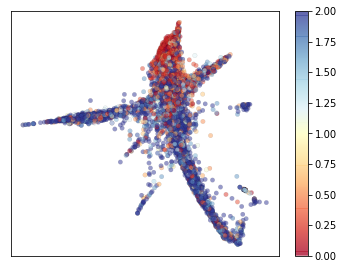

In [43]:
### Here we plot and save the Activity parameter

fig_size = plt.rcParams["figure.figsize"]


# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 6
fig_size[1] = 4.5
plt.rcParams["figure.figsize"] = fig_size
print ("New size:", fig_size)

order = np.flip(np.argsort(table3['clusters']))
plt.scatter(x = table3['x'][order],y = table3['y'][order], s = 20, c = table3['relout'][order], cmap = 'RdYlBu', alpha = 0.5, linewidths = 0.1, edgecolors = 'black', vmin=0, vmax=2)
plt.colorbar()
#plt.gca().set_ylim(-400,750)
#plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
plt.show()
#plt.savefig('figures/RelActPlot_.png', dpi=300)

In [44]:
### This is to be able to reverse colormaps
import matplotlib as mpl

def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

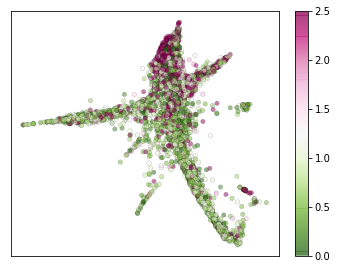

In [45]:
### Here we plot Mk-bias
cmap = mpl.cm.PiYG
my_cmap_r = reverse_colourmap(cmap)
order = np.flip(np.argsort(table3['clusters']))
plt.scatter(table3['x'][order],table3['y'][order], s = 20, c = table3['Mkbias'][order], cmap = my_cmap_r, alpha = 0.5, linewidths = 0.2, edgecolors = 'black', vmin=0, vmax=2.5)
plt.colorbar()
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
plt.show()
#plt.savefig('figures/MkbiasPlot_.png', dpi=300)

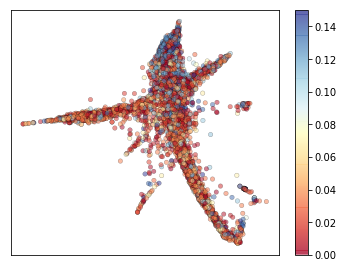

In [46]:
### Here we plot frequency of HSCs

plt.scatter(table3['x'][order],table3['y'][order], s = 20, c = table3['freqHSC'][order], cmap = 'RdYlBu', alpha = 0.5, linewidths = 0.3, edgecolors = 'black', vmin=0, vmax=0.15)
plt.colorbar()
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
plt.show()
#plt.savefig('figures/freqHSC.png', dpi=300)

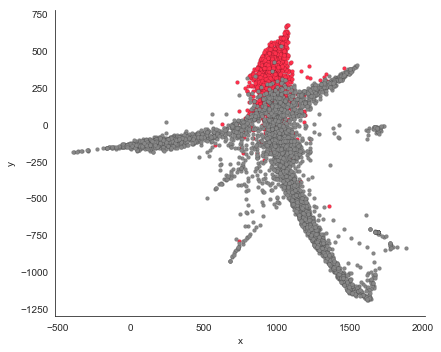

In [47]:
### Here we plot HSC clusters combined, in coral red, and Progenitor clusters combined, in gray

import seaborn as sns

sns.set_style("white", {'axes.grid' : False, 'xtick.bottom' : False, 'ytick.bottom' : False})
g = sns.PairGrid(x_vars=["x"], y_vars=["y"], data=table3, hue="clusters", height=5, aspect=1.2, hue_order =['15','19','9','10','2','0','3','4','7','8','11','6','1','5','12','21','14'],palette=['#FF304C','#FF304C','#FF304C','#FF304C','#878787','#878787','#878787','#878787','#878787','#878787','#878787','#878787','#878787','#878787','#878787','#878787','#878787'])
g = g.map(plt.scatter, s=15, edgecolors="black", linewidth=0.1)
plt.show(g)
#g.savefig("clusters.png", dpi=300)



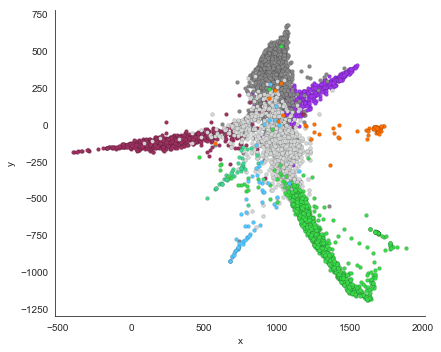

In [48]:
### Here we plot HSC clusters in dark gray, MPP clusters in light gray, and Progenitor clusters in different colors

sns.set_style("white", {'axes.grid' : False, 'xtick.bottom' : False, 'ytick.bottom' : False})
g = sns.PairGrid(x_vars=["x"], y_vars=["y"], data=table3, hue="clusters", height=5, aspect=1.2, hue_order =['8','11','15','19','9','10','2','0','3','4','7','6','1','5','12','21','14'],palette=['#9E35EF','#9E35EF','#878787','#878787','#878787','#878787','#9C315F','#9C315F','#d4d6d5','#d4d6d5','#d4d6d5','#42d691','#3BD84B','#3BD84B','#3BD84B','#51C6FF','#FF6F00'])
g = g.map(plt.scatter, s=15, edgecolors="black", linewidth=0.1)
plt.show(g)
#g.savefig("clusters2.png", dpi=300)



Current size: [6, 4.5]
New size: [6, 4.5]
(-0.7357907056353863, 0.0)


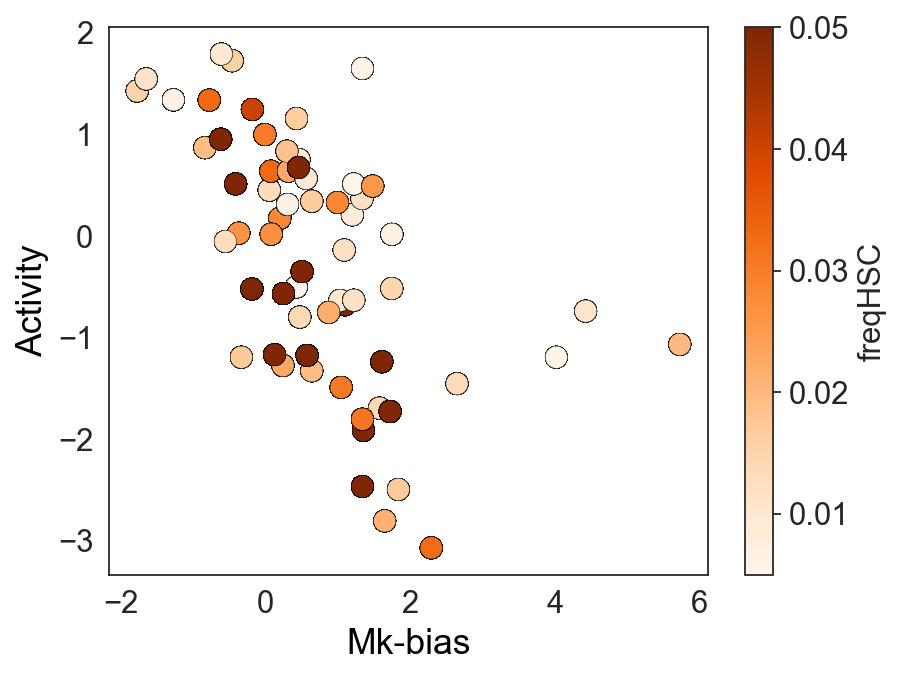

In [504]:
### Here we plot Mk-bias and Activity, only for clones that have an HSC frequency of more than 0.5%, and where we detect at least 1 Mk 

# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 6
fig_size[1] = 4.5
plt.rcParams["figure.figsize"] = fig_size
print ("New size:", fig_size)

tablemod = table_s1s2s3[table_s1s2s3['freqHSC']>0.005] 
tablemod = tablemod[tablemod['Mkbias']>0] 
x = tablemod['Mkbias']
y = tablemod['relout']
z = tablemod['freqHSC']

plt.scatter(x.apply(np.log),y.apply(np.log), s = 100, c = z, cmap = 'Oranges', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=0.005, vmax=0.05)
plt.colorbar(label='freqHSC')
plt.gca().grid(False)
plt.ylabel('Activity', fontdict = font)
plt.xlabel('Mk-bias', fontdict = font)
plt.savefig('Mk-relout_.png', dpi=300)

print(stats.pearsonr((x).apply(np.log),(y).apply(np.log)))


In [487]:
tablemod

x           y    samples                       barcodes  \
0      -36.235930 -141.866990   Kit_85_2  AAGTTGTACACACTAGACTTCTGACAAAG   
1     1180.398860 -638.861930   Kit_85_2  AAGCTGCTGGCATCCAACAACAGAACATG   
2      390.741100 -123.451260   Kit_85_2  AAGCTGCTGGCATCCAACAACAGAACATG   
3      298.338730  -83.791180   Kit_85_2  GAAATGAAAACAGACGACACATGATCCTG   
4      283.520770 -135.585800   Kit_85_2  AAGCTGCTGGCATCCAACAACAGAACATG   
...           ...         ...        ...                            ...   
4831  1000.287099   29.797140  1992_Kit5  CTGGTGGCTACAGTACACATCAGACACCG   
4834   941.475965  293.954057  1992_Kit5  CGATTGTACGCAACTCACTCACGACATTG   
4836   991.168472   56.855978  1992_Kit5  ACACTGAAAACAACAAACAGCAGATTGGG   
4839  1693.812968  -33.218672  1992_Kit5  ACACTGAAAACAACAAACAGCAGATTGGG   
4840  1679.490328 -730.766123  1992_Kit5  ACACTGAAAACAACAAACAGCAGATTGGG   

     clusters    relout    Mkbias        Mk   freqHSC  Mkbias>1  Mkbias>4  \
0           0  1.188968  1.220796  0.023256  0.028728       1.0       0.0   
1           1  3.475656  0.835914  0.063482  0.040220       0.0       0.0   
2           2  3.475656  0.835914  0.063482  0.040220       0.0       0.0   
3           0  0.278957  1.275637  0.003771  0.022983       1.0       0.0   
4           2  3.475656  0.835914  0.063482  0.040220       0.0       0.0   
...       ...       ...       ...       ...       ...       ...       ...   
4831        7  1.760188  1.757059  0.005376  0.009494       0.0       0.0   
4834        9  1.406992  1.901733  0.019844  0.016878       0.0       0.0   
4836        7  1.957554  1.584979  0.159140  0.084916       1.0       0.0   
4839       14  1.957554  1.584979  0.159140  0.084916       1.0       0.0   
4840       12  1.957554  1.584979  0.159140  0.084916       1.0       0.0   

      notbiased  inactive  active  
0           0.0       0.0     1.0  
1           1.0       0.0     1.0  
2           1.0       0.0     1.0  
3           0.0       1.0     0.0  
4           1.0       0.0     1.0  
...         ...       ...     ...  
4831        1.0       0.0     1.0  
4834        1.0       0.0     1.0  
4836        0.0       0.0     1.0  
4839        0.0       0.0     1.0  
4840        0.0       0.0     1.0  

[17326 rows x 14 columns]

In [65]:
### import scanpy and anndata
import scanpy as sc
import anndata

In [66]:
#Load genes x cells matrix
X_1ini = sc.read_csv('ARF2019_Sample1_new_counts_norm.csv.gz', first_column_names=None, dtype='float64')
X_2ini = sc.read_csv('ARF2019_Sample2_counts_norm.csv.gz', first_column_names=None, dtype='float64')
X_3ini = sc.read_csv('ARF2019_Sample3_counts_norm.csv.gz', first_column_names=None, dtype='float64')

In [67]:
#Transpose matrix for experiment 2 and 3
X_2ini = X_2ini.transpose()
X_3ini = X_3ini.transpose()

In [68]:
#Define gene names
X_1ini.var_names = pd.read_table('ARF2019_Sample1_genes.txt', header=None)[0]
X_2ini.var_names = pd.read_table('ARF2019_Sample2_genes.txt', header=None)[0]
X_3ini.var_names = pd.read_table('ARF2019_Sample3_genes.txt', header=None)[0]

In [69]:
#Generate a copy of the matrices
X_1 = X_1ini
X_2 = X_2ini
X_3 = X_3ini


In [70]:
sc.pp.normalize_total(X_1, target_sum = 20000, exclude_highly_expressed = True)
sc.pp.normalize_total(X_2, target_sum = 20000, exclude_highly_expressed = True)
sc.pp.normalize_total(X_3, target_sum = 20000, exclude_highly_expressed = True)

In [293]:
#Define LTHSC gene signatures
Giladi = ['1110017F19Rik','2410006H16Rik','2900062L11Rik','4931406C07Rik','AK046388','AK079675','AK197603','Acot1','Aldoc','B144','Basp1','Bgn','Car2','Cd27','Cd274','Cd74','Cd81','Cish','Clip3','Dapp1','Dkkl1','Eltd1','Fchsd2','Gabarapl1','Gcnt2','Gimap1','Gimap6','Gm6251','Gpr56','H2-K1','H2-T10','Hlf','Hoxb2','Ifitm1','Ifitm2','Ifitm3','Krt18','Ldhb','Leprel2','Lhcgr','Lmo2','Ly6a','Malat1','Mecom','Mllt3','Mpl','Msi2','Mycn','Myct1','Myl10','Nfe2','Oasl2','Osbpl1a','Pcp4l1','Pde4b','Pdzk1ip1','Pglyrp2','Pla2g16','Pnrc1','Procr','Ptplad2','Ptpn18','Ptprcap','Rbp1','Rbpms','Rgs1','Rtp4','Serpina3f','Shisa5','Srgn','Stxbp4','Tbxas1','Tgtp2','Tmem176a','Tmem176b','Tnip3','Txnip','Ube2l6','Wfdc2','Whamm','Zfand5','Zfp608','Zfp831']
Cabezas_dHSC = ['Bst1','ENSMUSG00000080851','Ace','Blk','Gpr35','Sh2d2a','Il13ra1','Cebpe','Lcn2','Col8a2','Tnfrsf19','Gp49a','Rnf39','LOC101055671','Mcemp1','Pid1','Wfdc21','Clmp','Ccr2','Mmp9','Cd2','Ms4a4b','Ifitm6','ENSMUSG00000096982','Gpr141','Upb1','ENSMUSG00000081953','Nova1','Gm14085','Col1a1','Atp8b4','Hsd11b1','ENSMUSG00000097383','Lilrb4','Pik3r6','Ebf1','Gypa','Wasf1','ENSMUSG00000085872','Ccr1','Klra13-ps','Yap1','Siglech','Tifab','Cd79a','Sparc','Tyrobp','Lonrf2','Hba-a2','Mpo','Irf8','Fabp4','Zfp82','Klrd1','Cybb','Hp','Gzma','Hbb-bs','Spon1','Clec12a','Lpxn','Add2','Ctss','Elane','Ccl5','Igf1','Ctsg','Glcci1','Ptpru','Ms4a3','Meg3','F13a1','Plac8','Ly6d','Cd52','Vpreb3','Ahnak','Camk2n1','A330023F24Rik','ENSMUSG00000097138','Abcg4','Cd53','Pld4','Nrp1','Cd209a','Hdc','Amica1','Gfi1','Atp1b1','Dse','Tcf7','ENSMUSG00000097579','Gprc5c','Klf2','Evi2a','AI607873','Kcnd3','Sorl1','Hbb-bt','ENSMUSG00000097035','ENSMUSG00000097451','Usp27x','Ccl6','Sema4a','Mpeg1','Fcrla','ENSMUSG00000093760','Lgals3','ENSMUSG00000079357','Trpm5','1700022I11Rik','Rab44','ENSMUSG00000099757','Ap1s2','Pirb','Mb21d2','Ms4a6c','ENSMUSG00000097274','Ncf1','Csf1r','Arhgef26','Sfrp2','Milr1','Itga9','Csf2rb2','ENSMUSG00000076609','BC035044','Sell','Bmp8a','Cldn5','Tulp1','Ppargc1a','Mzb1','Atp1a3','Anxa2','Xdh','Slpi','Ablim1','Jag1','Cd7','Trps1','Gimap3','Slc31a2','Satb1','Cpm','Eno2','Sfmbt2','Dusp5','Ly86','Bach2','Exph5','Igsf6','Gpx3','Pou2f1','Boc','Ctsh','Hk3','Zc3h12d','Cd68','Gria3','ENSMUSG00000070271','Dnhd1','Relb','Ctse','Blnk','Pglyrp1','Cyp26b1','Pou6f1','2010002M12Rik','Plk2','Ror2','Rfx3','9930111J21Rik2','Smtnl1','Gbp9','ENSMUSG00000081974','Ms4a6b','4632428N05Rik','Maf','Lipo1','M1ap','Fgfr3','Npr2','St8sia4','Acbd4','Fcer1g','Cnbd2','ENSMUSG00000089706','ENSMUSG00000084760','Fam102a','Trib1','ENSMUSG00000097250','ENSMUSG00000067017','Trp53inp1','Slc4a3','Gpr183','Nrk','ENSMUSG00000097507','Medag','Net1','Tnfaip1','Cd247','5031434O11Rik','Syn3','Psap','Naip5','ENSMUSG00000084756','ENSMUSG00000097838','Ticam2','Nhsl2','Camk2b','Lck','Clcn5','Ehd2','Klrc2','Zcchc18','4930486L24Rik','Mapk12','Prkcb','Btbd3','Clec7a','Arhgap26','B4galt6','Ccpg1','B130006D01Rik','Ncf2','Pkib','Ets1','Fgd4','Zfp354c','Mn1','2810055G20Rik','Shroom1','Fscn1','Tulp4','Gm12185','Rpgrip1','Gbp4','ENSMUSG00000092274','Sh3bp5','ENSMUSG00000097045','Peli2','Nacc2','Zfp287','Nbea','Cdc42se2','Ddhd1','Pik3r1','Il4','Zhx2','Exoc6b','Sdc4','Pqlc3','Tmc4','Sqrdl','D17H6S53E','Gm973','Lyz2','Tifa','Tgfbr1','Catsperg1','Slc44a1','Socs2','ENSMUSG00000089829','Alas1','ENSMUSG00000100691','Dock10','Zfp612','S100a6','Aff1','Osbpl5','B4galnt4','Kazald1','Trim5','Prnp','Plag1','Idh1','Igf2r','Phkb','Ikzf2','Tpm4','Sirpa','Mmp16','Tulp3','Efnb2','Brwd1','Chst2','Luc7l2','Scpep1','Lzts1','Hivep3','Zfp318','Lyst','Oraov1','Iigp1','Smurf2','Notch1','Dpp4','Cd82','Camk2d','Ptpn14','Fcho2','Clcf1','Elac1','Rit1','Qprt','Ifitm7','Nipa1','Hdac10','Lsp1','Blzf1','Sat1','Rrm2b','Zscan26','Znfx1','Agpat4','Pfkfb2','Zfp937','Ugcg','Tecpr1','Alcam','Parp14','Tns1','Zfp329','Pam','Zfp831','Apbb1','Cyb561a3','ENSMUSG00000087390','Rhbdf1','Tenc1','Fam208a','Anxa6','Hspa2','Galm','Notch3','Dok1','Rin2','Mturn','Tmem161b','Rab11fip3','Galnt7','Slfn2','Ccl4','Glipr2','Zcchc7','Pde8b','Nav2','Uspl1','Fn3k','Rgl1','Ltb','Zfp560','Gsta4','Fam118b','Arid5b','Emb','Zmat1','Mfhas1','F830016B08Rik','Elmod3','Cish','Ebi3','Cd2ap','Neil1','Apobec1','Gchfr','Slc31a1','Arid5a','1810013L24Rik','5930430L01Rik','Pde7a','Marf1','Stat2','Gm2a','Ccdc171','Cd83','Cd84','Arl6ip5','Sgms1','Mgst1','ENSMUSG00000097777','Ikbke','Zc2hc1a','Traf1','Plxdc2','Dmtf1','Cyba','Mroh1','Spata13','Btd','Sgsm1','Usb1','Ivd','Tinagl1','Tbce','Ptafr','Taf8','Atg10','Lgr4','Myadm','ENSMUSG00000101609','Islr','Rbl2','Xrn1','Map3k1','Akap7','Map4k2','2310035C23Rik','Mpzl1','Cirbp','Vps45','Tmem154','ENSMUSG00000085334','Pde2a','Erlec1','Med11','Zfp36','Tax1bp3','Gbp8','5830428H23Rik','Kif1b','Kat6b','Cd1d1','Ly6a','Hid1','Cd200r1','Slc25a44','D930015E06Rik','Gimap8','Ctsl','Rnf167','ENSMUSG00000097258','Phf8','Slfn8','Prpf39','ENSMUSG00000073274','Smpdl3a','Sp100','Ankrd12','Syne1','Trim34a','Arhgap17','Ell2','Itsn1','Arid4a','Hoxb3','Creb3','Kdm5b','Letm2','Gm12942','Nr6a1','Id2','Chmp5','Isca1','Rbm47','Zfp60','Gimap6','Dpm2','Kdelc2','Utrn','Pnck','Ptprc','Zcchc10','R3hdm1','Acsl1','Sult1a1','Rbm18','Rnf216','Ccnt1','Bgn','ENSMUSG00000079143','Ric1','Rora','Trip4','Kdm6b','Agtrap','Tnip3','Tbc1d8','Snx18','6330416G13Rik','Procr','Lbp','Trim30a','2310001H17Rik','Tgtp2','Pygl','Serpinb9','Ndrg2','Irf9','Lurap1','Smap2','Ctns','ENSMUSG00000073867','Rnf214','Ifngr1','Cers4','Bin3','Cox7a2l','Tubb6','Xbp1','Eya2','Trim65','Ccser2','Lima1','Ctsb','Cd24a','Cyth4','ENSMUSG00000044867','Ube2f','Ezh1','Cdc26','Hoxb5','Cyp4f13','Nsun4','Gpn1','Mettl7a1','Slc25a36','Oasl2','Slc22a18','Lst1','Trib3','Inpp4a','Il2rg','Samhd1','Tsc22d1','Epb4.1l4b','Cytip','Ecscr','Araf','St7','Traf3ip3','Gstm1','Rock2','ENSMUSG00000041481','Il16','Tspan14','Impact','Trim41','Arglu1','Fam107b','Slfn5','Mcoln2','Gm4951','Phyh','Sepp1','Vamp4','Foxp1','Dtx4','Nipbl','Il15','Pgpep1','Ip6k1','ENSMUSG00000069540','Vipas39','Rab3il1','Abhd14b','Klc4','Igf1r','Pla2g15','Marcks','Prrg2','Ginm1','Ppox','Elk4','Copz1','Pan3','Ifitm1','ENSMUSG00000064339','Gatsl2','Pdzk1ip1','Ndn','Irf7','Pik3cd','C530008M17Rik','Ccnl2','Alkbh5','Plin3','Ddx60','Cyp2j9','Zbtb20','Anxa1','Paqr7','ENSMUSG00000097296','ENSMUSG00000092250','Fyco1','Gfpt2','Sp140','Notch2','Gimap5','Wtap','Insig1','Tbc1d20','Nfia','Ctsf','Hlf','Zeb1','Mllt3','Iqgap1','C1rl','Mecom','Cbx6','Dennd1c','Sesn1','Mxd1','Clip3','Map3k5','Birc6','Eci2','Crebrf','Shisa5','Tsc22d3','Atp6v1b2','Cpq','Kmt2d','Abhd2','Fis1','Nceh1','Pygm','Tmem173','Tnip1','H2-T23','D630039A03Rik','4632427E13Rik','Srxn1','Tbxas1','Slc39a1','Npc2','Mtm1','Zbtb4','Baz2b','Efna1','Tmem50a','Tmem176a','Gata3','Btg1','Hbp1','Rac2','Jam2','Ago4','Irf2','Rabep2','Lpp','Eps8l2','Tgm2','Kmt2a','Scaper','Ldhb','Dcaf11','Irf1','Csad','Ppp1r16b','Dus2','AW112010','Gba','Prr13','Use1','Taf7','Ephx1','Ftl1','9530082P21Rik','Acot2','Porcn','Erg','Actb','E130102H24Rik','Lyrm5','Pard3b','Otub1','Tcp11l2','Pnpla7','Amz2','Saraf','Arhgdib','Fbxo44','Pnp','Vdr','Frmd4b','Ppm1h','Myof','Ccrl2','Mfng','Dph5','Crebl2','Pak1','Nudt12','Tlr4','Nadk2','Tnfaip8','Pecam1','Tox','Glul','Sash3','Fam129a','Tmsb15l','Dusp2','Enpp5','Gpr171','Slc50a1','Foxo3','Smim24','Cdkn1b','Tmem176b','Uba7','Obscn','Ccndbp1','Por','Anxa5','Selenbp1','Tnfrsf1a','Fxyd5','Ifi44','Fcgrt','AA986860','9130008F23Rik','Mxra8','Map1lc3b','Txnip','Runx1t1','Mdh1','Prkaa2','Renbp','Eef2','Dph7','Tspan31','LOC171588','Aldoa','Gpr56','Mill2','Sqstm1','B2m','Tmem167b','Prom2','Spry2','Tctex1d2','Tcn2','Cyb5a','Ica1l','Eef1a1','Lpin1','Nr1d1','Pla2g16','Hsd17b10','Hgfac','Art4','Rps3a1','ENSMUSG00000089726','Gatad1','Txndc17','Ubl7','Rpl7','Gstm5','Osgin1','Pcbd1','Prune2','Npepps','Gprasp2','Rbbp9','Osbpl1a','Icam1','Tmem141','Cln3','Cyp2j6','Maged1','Phpt1','ENSMUSG00000086179','Pglyrp2','Acaa2','Pml','Abhd14a','Tceal1','Tpp1','4930481A15Rik','Meis3','Chil5','Stambp','Gstt1','Matn4','Cpne8','Dkkl1','Snrpn','Ly9','Cd302','Ssh3','3110043O21Rik','Hhat','Slc26a11']
Cabezas_HSC_MPP = ['Adipor1','Dennd4a','St3gal6','Adcy7','Eng','Nlrc5','Sgms1','Zfp945','Dhx57','Cd151','St7','Naip5','Crebrf','Pkn1','Rufy2','Cry2','Lima1','Tcf7l2','Gata3','Wbscr27','Snord14a','1110008F13Rik','6720401G13Rik','Samhd1','C1rl','Selm','Hlf','Nbeal2','Grina','Mylk','1700094D03Rik','Zfp184','Birc3','Ypel2','Hs1bp3','Sat1','Stxbp4','Adrb2','Hilpda','Dsel','A230050P20Rik','Tbc1d8','Pnck','Pdzk1ip1','Sema4b','Sorbs2','4930481A15Rik','Pqlc3','Rhoj','Kcnip3','Znfx1','Arhgap31','Fam222b','Ndn','Fam213a','Obscn','Atp10d','Csad','D630039A03Rik','Ecscr','Nrk','Ccdc157','Mfap2','Fcgrt','Crebl2','Nabp1','Rgl1','Tmcc1','Gda','Vdr','Trim14','Adarb1','Zfp831','Tnks1bp1','Inadl','Gstm1','Slc39a13','Fam84b','Gm15651','Nav2','Dock6','Gimap8','Rarb','Lhcgr','Mecom','Gm20467','Dnhd1','Mageh1','Snn','Rhbdf2','Ghr','Zbtb4','Arl10','Gimap5','Tox','Gm19967','Sqrdl','Igf2r','Gm11696','Ifitm1','Igf2bp2','5830444B04Rik','H2-K2','Satb1','Ccdc60','Gm7676','Ctsf','Wdr78','Erp27','Pvrl4','Elmo3','Neu1','Agpat4','Hdac11','Chst15','Ppp1r16b','Insrr','Coro2b','Airn','Rusc2','Tnip3','Hid1','Btc','Mgst1','Art4','Egln3','Fam131a','Spo11','Rab20','Xkr6','Irf6','Mllt3','Abcg3','Gm12258','Hivep3','Lurap1','Pou2f2','Gm5148','Vsig2','Gm10651','Jhdm1d','H2-Eb1','Gm16565','Csf2rb2','Gm13822','Prex2','Hoxb5','Ikzf4','Gbp8','Cystm1','Upp1','Mboat2','Gas6','Wfdc2','Card10','Aim1','Magi2','Osgin1','Mks1','Clec1a','Sgsm1','3222401L13Rik','Traf1','Ryr3','Mgst2','Myof','Pygm','Dnajb5','Zfp612','Mapre3','Mmp28','Efcab4a','Pde6h','Rhbdf1','Sox5','Neb','Glipr1l1','Clip3','Gm4951','Kazn','Gm10499','Neil2','Gkn3','Cd28','Tead3','Sult1a1','Pde1b','Cpne8','Chst2','Gm11100','Trib2','Plekhg6','Runx1t1','Procr','Atp9a','F830016B08Rik','1810062G17Rik','Ifitm7','Cd74','Amigo2','Chi3l7','Spin4','Sfrp1','Maf','Gbp6','Unc45b','Pbld1','Sdc4','Plekhg1','Disc1','Gm6939','Wnk4','Gm13111','Ptges','Ocln','Ccdc136','Zfr2','Npas2','Nova1','Igf1','Gm23706','Slc17a8','Gbp9','Setbp1','Sox9','Zfp37','Igf2','Tenc1','Exph5','Meg3','D230022J07Rik','Efna1','Fut4','Klrb1c','Gimap3','A3galt2','Cyp26b1','Gm9378','Neo1','Shd','Inhba','Sema6d','Gm15034','Gfi1','Glis1','Sntg2','Stx1a','Actn3','4933406I18Rik','Ccdc152','Panx2','Chst7','2010015L04Rik','Slc19a3','Ccr5','Gbp10','Gm14207','Cldn4','Gprc5c','Gm14252','Csdc2','Pon1','I830012O16Rik','Bmper','Tgfa','Pla2g7','Dusp26','Fam83h','Ak7','Sh3rf3','Ncam2','Sh3gl3','Prss41','Sh3gl3']
Wilson_molO = ['Fads3','Sox18','Gstm1','Ctsf','Smtnl1','Mettl7a1','Ptpn14','Cldn10','Fgfr3','Cdkn1c','Ly6a','Ubl3','Ramp2','Cd82','Sult1a1','Sqrdl','Neo1','Pde1b','Vwf','Neil2','Trim47','Limd2','Gimap6','Gimap1','Ifitm1','Mllt3','Ltb','Pdzk1ip1','Procr','Pdzk1ip1']
Wilson_suMo = ['Tgtp2','Mapk12','Ndnf','Ly6e','Gm4951','St8sia4','Procr','Cyp27a1','Cd74','Ralgapa1','Ablim1','Gbp8','Sult1a1','Ramp2','Gbp6','Ifitm3','Wfdc2','Mllt3','Inhba','Ifitm1','Ly6a','Ifitm1']
Lauridsen = ['Elmo3','Ubl3','Lat2','Agpat2','Pold4','Tmem132a','Wdr83','Lbp','Tmem37','Gm16201','Txndc15','Rasgef1a','Ccnd2','Ptger1','Napsa','AI462493','Sqrdl','Sdsl','Mcfd2','Oas1a','Ddx31','Srsf12','Gm4841','Car11','Slfn8','Adcy7','Rps7','Copg1','Hoxa9','Naip5','Zfp1','Sidt2','Tom1l2','Acer2','Casd1','Ptplad2','Eid1','Ctsh','Rpl27a','Mylk','Gbp6','Vamp1','Leng8','Vamp2','Pafah2','Slc50a1','Arid3b','Gm5148','Ptprcap','Zfp677','Pccb','Gbp7','Pkp3','Itsn1','Gabbr1','Art4','2410002F23Rik','Ftl1','Rps15','Dusp2','Gba2','Iqce','Tns1','Poli','Arhgdib','Snn','Mpnd','Tspan4','Sesn1','Bdh2','Pcmtd2','Spi1','Tbc1d17','Rpl5','Aplp2','Clec2d','Gm13822','Tsc22d1','Wash','Ric8','Orai1','Zfp959','B4galnt4','Uba7','Rpl21','Gm12575','Zfp618','Ankrd13d','Xaf1','Ahnak','Bmyc','Pnrc1','Laptm5','Psme1','Prdx5','Ddit3','Armc3','Sh3bgrl3','Ptk7','Lgals1','St3gal1','Col4a2','Arid4a','Rap1gap','Slc35c2','Ccl4','Odf3b','Fam109a','Pim2','Kazald1','B4galt6','Hoxb6','Ldhb','Ccdc88b','P2rx4','Gprasp1','Oasl2','Irgm2','Ptk2b','Zbtb20','Mamdc2','Fis1','Tcf25','Rabac1','Lrrn4','Vat1','Lyl1','Iigp1','Tnfaip8l2','Gabarapl1','Galnt6','Cd27','Rps3a1','2210404O07Rik','Sash3','Dnah1','Aim2','Hbp1','Itpkb','Tie1','Rpl19','Dusp5','Zfp773','Gimap5','Lfng','Tspyl2','Serpinb6a','Lpin1','Fam21','Gm20467','Prrg2','Il16','Trav7n-6','Eva1b','Fam63a','E2f5','Clip1','Ltbr','Gltscr2','Gm15473','Hyi','Robo4','9930111J21Rik2','Map3k14','Dcxr','Dync1h1','Cyth4','Rnf25','Sgip1','2410006H16Rik','Sh3bp1','Entpd1','Slfn2','Csf2rb','Ebi3','Tmem63b','Plcb2','Itgb7','C1rl','P2rx7','Tnfsf12','Rltpr','Pvr','Rgl1','Unc93b1','Bcl9l','Gbp3','Fmnl2','Tmem176a','Sgpl1','Ppap2c','Ldlrap1','Snx20','S1pr4','Rps27a','Ptpre','Arid5a','Rps23','Prtn3','Sft2d2','Hlf','Fgd2','Dennd1c','Ifi44','Psd4','Cnrip1','Il2rg','Guca1a','Ccbl1','Mecom','Tef','Pstpip1','Tcf7l2','G430095P16Rik','2410004N09Rik','Hdac11','Csf2rb2','Rps14','Cyp4f13','Rpl35','Rhbdf1','Il18','Ergic3','Acap1','Rpl36','Clcf1','Camk1','Aph1c','Cox7a2l','Gas6','Eef1a1','Itfg3','9030025P20Rik','Trim47','Mrpl23','Ppcdc','Rpl28','Tinagl1','Rpl18a','Gm3345','Rnf125','Atp6v1g2','Ramp1','Tbc1d10c','4732463B04Rik','Tmub1','Ecscr','Mettl7a1','Ubl7','Pdlim2','Rplp2','Hid1','Rnasel','Smad7','Ndn','Abcg3','Pou2f2','Dok3','Clip3','Gstm7','Shisa5','Fam53b','Dkkl1','Flot1','Gm16104','Mllt3','Atp6v1d','Efcc1','Fau','Chrnb1','Cuedc1','Rab6b','Sema7a','Lsp1','5830428H23Rik','Islr','Pnpla7','Inadl','Myof','Limd2','Gramd1b','Npr2','H2-T23','Ctss','Tle2','Sema4g','Ifitm3','2810008D09Rik','Acot1','Anxa6','2310015A10Rik','Cbx7','Use1','Mapk1ip1','Neat1','Parp14','Tbkbp1','Ltbp3','Klc4','Parp3','AC149090.1','Neurl3','Padi4','Upp1','Mib2','E430024P14Rik','4930581F22Rik','Cyp2j9','Cd82','Ctsl','Gbp8','Gapdh','Lax1','9930104L06Rik','Cd37','Samhd1','mt-Co1','Smpdl3a','Hk3','Chd3','Pik3ip1','Pde1b','Ptges','Rps16','Kdm6b','Rpgrip1','Zbtb4','Gimap1','Tmem176b','Rps27','Mvp','H2-Eb1','BC026585','Jhdm1d','Sox4','Cln3','5830416P10Rik','Gm2830','Tmem53','Mboat4','Ikbke','Tecpr1','A430104N18Rik','Hoxa7','Tcp11l2','Sytl1','Pdzk1ip1','Gstm1','Carns1','Ifit1','Zfp467','Gm14302','Stxbp4','Sult1a1','BC005764','B230378P21Rik','Gimap6','Pbxip1','Dlgap4','Pim1','Cd74','Procr','Eno2','H2-Aa','Meg3','Ifitm1','Ctsf','Ly6a','Ypel3','Lst1','Ltb','Lst1']
Pietras = ['1810020D17Rik','Thtpa','Abl1','Phc1','9130011E15Rik','Gpx8','Capn3','Paip1','Bdh2','Phlda2','Ctsl','Clic4','Xrcc4','Ddx58','Slc14a1','Pcmtd2','2400003C14Rik','Tdrkh','Atad1','Fap','4931406C07Rik','Tjp1','Eef2','Msmp','Olfr632','Pygm','Pcyt1b','Ppp2r2b','Vmn2r37','Tmem38a','Chst14','Galnt6','Apool','Epb4.1','Ncrna00153','Lat','Camk2d','Armcx1','Tbl1x','Stxbp1','F2r','Zc3h14','Zfp37','1600012F09Rik','Ctnna1','Acp6','Nsg1','Pkp4','Gnai1','Sirt2','Vezf1','Fbxo16','Zfp286','4930455F23Rik','Fn3k','4930506M07Rik','Prkcdbp','Zfp410','Gpr177','3222402P14Rik','Zfp788','D10Wsu102e','Selp','Irf6','AB041803','Pex3','Gm973','Zfp667','2310005E10Rik','EG666280','Batf','EG331392','Ascc1','2810408M09Rik','Rnf139','5830443L24Rik','Adss','Itgb6','Zc3h7b','5730455O13Rik','Mmp23','Ei24','Zscan18','Slc16a2','Nfia','Dync2li1','Slc12a2','Prps1','Ddx19a','Net1','Dhx58','Gprc5b','Eif2c3','Tmem176b','Ahcyl1','Gtpbp8','Stx4a','Nsdhl','Phldb2','Olfr1444','Lama4','Gimap5','OTTMUSG00000022410','Vps45','Eid2','Rps6ka6','Arhgef9','Plscr2','Smu1','Slc16a12','Ift20','Adamts6','EG638904','Zfp560','Mpdz','Fkbp7','Gatad1','Myo1d','Chchd7','Kcnk5','Slc17a8','Ahcyl2','S1pr1','Ift172','Med23','Nxf2','Rhoj','Rcor3','Nipal2','Ttc39b','Ppme1','Zfp799','Cdc42bpa','Gtf2i','Map3k12','Clock','Fmnl2','Zfp27','Zbtb38','Rab13','Abi2','Cct4','Cpxm1','Ppm1a','Gnl3l','Galc','1200014M14Rik','Rbbp9','BC051142','Pkia','Tarsl2','Lin7c','Rbpms2','Art2b  // Art2b','Fbxo32','Ube3c','Nsfl1c','8430410K20Rik','Batf2','Rad9b','Muc13','2310045A20Rik','Gulp1','Tmem60','Thumpd2','Slc25a4','Bag2','Sfxn4','B230118H07Rik','AV320801','2210023G05Rik','6330577E15Rik','Tspan6','Cops4','2700007P21Rik','Olfr341','Ctla2b','6030445D17Rik','Maff','Tspan4','Lrrc1','Ttc23','Ehd2','Pccb','Kdm3a','Klhl6','Ik','Mapre3','Nicn1','Plcb4','Tbc1d17','Rsad2','Akt3','Auh','Gns','3110007F17Rik','Nupr1','Arhgap6','Aldh18a1','Cyb5','Ndst2','Gpr125','Gnpda2','Prpf6','Ift52','Dnajc7','Hscb','BC023179','Slc36a4','Fam119a','Lamc1','Adam10','Cyp4f16','Sdpr','Fbxo25','Tnfsf9','Car5b','BC066028','Klhdc1','Rcn3','Stk39','Akr1e1','Copb1','Fbxo21','Mitd1','St5','Sqle','Cpt1a','Pak1','Rnf208','Tom1l2','Txndc14','Tmem59','Acvr1','1110017F19Rik','Suclg2','Vmn2r34','Elmo3','Kit','Sepw1','4930430F08Rik','Cdcp1','Gbp5','Zfp11','Abcc3','Tm9sf4','Ube2cbp','Slc25a20','Mds1','Rbp1','Rab11a','Afap1l1','ENSMUSG00000074066','Car8','Trove2','Caprin2','Galm','BC066107','Cul1','Ttc21b','Cebpz','Hoxa5','Ppa1','Etnk1','Tcf12','Kdelc1','Zmym6','Gja1','Sgms1','Fgfbp3','Akr1c13','Srebf2','Sesn1','Wfdc2','Rbak','1300010F03Rik','Hdac8','Arhgef12','C330018D20Rik','Enkur','Prpf8','As3mt','OTTMUSG00000003456','Mcoln2','4933431E20Rik','Pbx1','Aig1','Ttll7','Wdr47','Dusp16','Map4k3','Cyp2j9','Pgm2','Nat5','Tceal3','Oas1c','Mid2','Morn4','Hdac1','Bco2','Osbpl1a','Meis1','Pla2g4a','Btg3','Serpinf1','Galnt5','Invs','Hspa12b','Nelf','Morf4l2','Scrn1','BC016495','Plekha8','Pls3','2810002D19Rik','Atp8a1','Isoc1','Cat','2610018G03Rik','Gfpt2','Wdr45','Sord','Lphn2','Ccdc91','Ptk2','Itih5','Ell2','Tcea2','Serpinb6a','Reps2','Impact','Gm447','Mylk','ENSMUSG00000053218','Pim2','Grik5','Rnf4','Zfp184','Hsbp1','Cxx1c','ENSMUSG00000072769','Mtrf1','Dnajc18','Gcnt1','Ripk2','Hacl1','Rbm22','Zfp462','BC031353','Etfdh','Ccdc60','Dennd2d','Ccnd1','Mina','Anapc4','Paip2','Anxa5','Rarb','Psmd12','Maoa','3110001K24Rik','Cab39l','Por','Zfp512','Eid1','Ngfrap1','Efr3a','Glul','Zfp317','Tmem176a','Clip3','Tbrg1','Acss2','Slc48a1','Gltscr2','Stx6','Cyr61','LOC100044195','AW146020','Zfp711','Aadacl1','Rhobtb1','Slc3a2','Gpr64','Olfr738','Smyd3','Tmtc2','Efnb2','Zfp229','4930579K19Rik','Dnajb4','Gstm4','5033414D02Rik','ENSMUSG00000075240','Fam164a','Nrap','C630004H02Rik','Rgnef','Pik3c3','Art4','Capsl','Obsl1','Bivm','Rshl2a','Acat2','Pdgfd','Tmem98','BC030046','Pstk','Ube2o','Dtd1','Fzd6','Rbms2','Nudt11','Islr','Ctsw','Eif5a2','Vwf','Rcn2','Tgtp','Pja1','Pdlim1','Gstm5','Gpr56','Taf1b','Zfp551','2810047C21Rik1','Dpf2','Ldhb','EG626854','Eif2c1','Tox','Def8','Seh1l','Zfp763','1700019E19Rik','Mfhas1','Bcs1l','Rabepk','Hmg20a','Rhof','Myd116','Rbbp7','Il15ra','Gucy1a3','Phlpp','Tgm2','Gimap6','Adamts1','Fam114a2','Reep6','E430025E21Rik','Zc3h8','Nt5c3','Hdac9','Bicd1','2810432L12Rik','Vwa5a','Cabc1','Pkhd1l1','9130008F23Rik','Ly6a','Acat1','Zmynd11','Mettl4','Dst','Clec1a','Ifi44','Bbs12','Stx12','Cfdp1','Arpp19','Zkscan5','Olfr930','Cln6','Fam184a','2310016E02Rik','Pus3','Stox1','Hey1','Serhl','Acsl3','Tjp2','St14','Grinl1a','EG625110','4833442J19Rik','Zrsr1','Pi4ka','Gnb5','Dock7','Socs2','Obfc2b','Zfp111','Zfp827','Scfd1','Rras2','Gabarapl1','Procr','Gcnt2','Cox7a2l','Sdc2','Lyplal1','Ptrf','Ltb','Rgs18','Hspa4l','Pbx3','Fam109b','Fscn1','Ifitm1','Rbm43','Arhgef5','Irak1bp1','Hlf','Rwdd3','Xlr3a','Atpbd4','Txnip','Jak1','Car13','V1rd20','Dctn5','6230409E13Rik','Cog6','Wdr5b','Zfp780b','Pttg1ip','Zfp161','Tmod3','Prdm16','1810048J11Rik','Nrk','Smarca2','Dyrk3','Ttpa','Dhx32','2810051F02Rik','Tcfcp2','V1ra5','Rora','Ldb2','Selm','Fam135a','Srxn1','6230427J02Rik','Arrdc4','Serpinb6b','Ebpl','Upp1','BC067074','Epb4.1l4b','Mink1','Prrg4','Cd81','Spa17','Ranbp17','Spo11','Tmem135','Pfkm','Eif4a2','F2rl3','BC020535','N4bp2l2','Plxnc1','4833408A19Rik','Casd1','Nmt2','Parn','Decr1','Lmbr1','Dnajc16','Tmem218','Ghitm','Fam110b','Tmem140','Copz2','D630039A03Rik','Samd12','Echdc1','BC026585','8430406I07Rik','Lmo2','Gfpt1','N6amt1','Ctnnd1','Tceal8','Dand5','C330011K17Rik','Pot1a','Zfp521','Jam2','Mtmr11','Apoe','Mynn','Crebl2','Chic1','Mllt4','Acyp2','Lix1l','Arl3','Dusp4','Stxbp4','Irak3','4732471D19Rik','Siae','Acadm','D16H22S680E','Extl3','Cpne2','Mtap','Kif3a','Trpc4ap','Exoc6b','BC055004','Gimap8','Kptn','Tbc1d19','Dtnb','Arhgap5','Alg11','Myo5c','Hmgn3','Wbp5','Slc16a9','Spred2','Ophn1','Tcam1','Olfr134','Prkch','Gpr128','Nomo1','Kbtbd4','C030039L03Rik','Tnfsf4','Mapk9','Rab38','Cyp51','Ryk','Gorab','Syde1','Mettl11b','Pter','4732418C07Rik','Mtap7d3','Zmym4','Ktelc1','Hsd17b10','Aspa','Ephx1','Rab27b','Taf9b','Zik1','Zfp94','Camkk1','Pgcp','Rragb','Cfl2','Isg20','Bex2','Mbtps1','Maged1','Hmox2','Zfp239','Cyp7b1','Enpp5','Htr2a','Ubl7','Sult1a1','Sgce','Aasdh','Tsr2','Bbs4','Slc25a3','Prdm5','Pik3r1','Cytsa','Trfr2','Ift122','Xlr3c','Pam','Mak10','Prkacb','Crot','Ppt1','Me1','Aplp2','Gnat2','4005','Xrcc5','Ccdc112','Fpgt','Aldh1l1','Xlr3b','A2ld1','Oasl2','Efhc2','Mettl3','Tnfrsf18','Xk','Casp12','Car2','Phkb','Sox6','Anxa4','Etv5','Acss3','Vsig2','Iqcb1','Snx6','Ifih1','Spg20','Cav2','Stau1','Prdx6','Naip5','Lrp12','Tfpi','Aida','Ptpn14','Maged2','Ctsf','Eepd1','Serinc1','Vdr','Ppic','Ahi1','Slc30a4','Txnrd3','Txnl1','Rnf14','Ctso','Plk2','Timp3','Cd99l2','Frmd4b','Trim47','Arsk','Sepp1','Il7','Ccdc122','Vps39','Tom1l1','Ghr','Khdrbs3','Fntb','Ccl19','Nedd4','Pon3','Srgap3','BC057079','Dock1','Crispld1','Dynlt3','Stat4','Mettl7a1','Tceal5','Fads2','Adam22','Mat2b','Rab12','Ap3b1','Raver2','Adipor2','Plekha5','Zfp26','Pomt2','Dctn4','Mfng','Srr','E2f5','Slc18a2','Erp27','St6galnac3','Tmem40','Arl15','Aldoc','Ccl27a','Tgfbr3','Il22ra2','Sbf2','Robo4','Rasgef1b','Ndrg3','Rpl7','Igf2bp2','Ppp1r13b','Clstn3','ENSMUSG00000058736','Mpl','Zfp455','Rufy2','Prkag2','Fnbp1l','Ptgs1','Lonp2','Ift81','Gramd1c','Serpina3f','Shroom4','Etv3','Mpa2l','Npr2','Gata3','Zdhhc17','Gng11','Csgalnact1','Lpin1','Sytl5','Stard4','Myof','Vipr2','Cyp2j6','Abcg2','Tmem67','Zfp637','Rg9mtd1','Trim21','Ptpn21','Rai14','OTTMUSG00000009332','Arl4a','H2-T22','Rhobtb3','Tfb1m','Cryz','Fads1','Irgm2','OTTMUSG00000005523','Palld','Wbscr27','Acox1','Rnf113a2','Mansc1','Rcor2','Fut10','EG240327','Slc35f2','2310057J16Rik','Ttc8','Itsn1','Lrrc9','Magee1','Cbr3','Krt18','Tmbim1','Ccdc62','Tgfb3','1110020G09Rik','Ccdc46','Ppap2b','Dpy19l3','Lrrc49','Pdxdc1','Snx25','Usp54','H1f0','Ube1l','Slc24a5','Fkbp9','Polr2b','1110032A03Rik','Golph3l','Parp12','Cyp4v3','Slc41a1','2010011I20Rik','Tsga14','5730469M10Rik','Fam171b','Pla2g16','Psmf1','Myct1','Gkap1','Esam','Zc3h12b','Mmp16','Enox2','Spire1','Ddx50','Pgrmc1','Plod2','Sorbs1','Rbl2','Tceal1','Pkdrej','Jam3','Zfp248','Fads3','Myh10','Inadl','Sema4b','Pafah1b2','Ptplad2','Eng','Acy3','Klf12','Treml2','Epcam','Cdkl5','Fam49a','Ric3','Pja2','Prcp','Plag1','Pdk3','Lgals8','D14Ertd668e','Sfrs12ip1','Ehbp1','Ptger3','Dsel','Ccdc28a','Rell2','Mamdc2','Mtap9','Mras','Tie1','Grb10','Cysltr2','Pftk1','Slc27a6','Aldh1a1','Pdcd6','Enpp4','Slamf1','Arhgap12','Cadps2','Kdelc2','P2rx1','Pctk3','Emcn','Rex2','Vegfc','Itga6','Abca5','Stau2','Mtss1l','Nap1l3','Prkcq','Fam110a','Iigp1','Bex1','F11r','Mageh1','Wdr19','Marveld2','Prex2','Mllt3','Klhl4','Bpgm','Cmas','Fech','Fam18b','Gsta4','Cish','Mboat2','Arhgef6','Nbea','Gbp2','Cc2d2a','ENSMUSG00000073019','ENSMUSG00000055181','Bex4','1700029J07Rik','Fstl1','Plscr4','OTTMUSG00000004461','Cldn12','Adarb1','Anpep','Eya2','Ptn','Trpc6','9930014A18Rik','Lrch2','Lrrc66','Myom1','Rapgef4','4930470H14Rik','Plxdc2','Tnip3','Slc6a15','Gbp4','Tek','Evi1','Fam110c','Tbxas1','Akap7','Itm2a','Nckap1','Ctnnal1','Mmrn1','Arhgap29','Dlg2','Abcg3','Pabpc4l','Kif21a','Lhcgr','Fzd3']
Rodriguez_2T1T_top100 = ['Ifitm1','Tsc22d1','Mycn','Vwf','Glul','Procr','Nupr1','Pik3r1','Pim1','Hlf','Mt1','Matn4','Mllt3','Art4','St3gal1','Mt2','Selp','Prtn3','Fut8','Adgrg1','Hoxb8','Ifitm3','Ptk2b','Lmo2','Gclm','Sbspon','Bex4','Ccnd1','Pgr','Gstm2','Oxr1','Socs2','Gapdh','Cdkn1c','Mpl','Clec1a','Adgrl4','F11r','S100a6','Gstm1','Slamf1','Serinc3','Cd63','Pdlim7','Ccnd2','Sult1a1','Tgoln1','Ptger4','Tspan14','Marveld1','Ehd3','Setd7','Gda','Fnbp4','Aldh1a1','Ltb','Hoxb4','Tgm2','Neurl1a','Samsn1','Mecom','Gng11','Amotl2','Kit','Pnpla1','Nkain3','Itga6','Sat1','Fam107b','Trim47','Jam3','Camk2n1','Podxl','Gnat2','Eif4a2','Efna1','Cldn12','Enpp5','Mcfd2','Gimap4','Nicn1','Bhlhe41','Vmp1','Calm1','Fam63a','Slc24a5','Cdc42','Ly6e','Rpl12','Traip','Nxpe5','Col4a2','Cbfa2t3','Plod2','Lpar6','Bmp4','Serpinb10','Hgs','mt-Nd5','Rhoq']
Rodriguez_inactive_top100 = ['Mpl','Ifitm3','Ifitm1','Tgm2','H2-K1','Socs2','Mycn','Nupr1','Hacd4','Mllt3','Gda','B2m','Procr','Txnip','Clu','Sult1a1','S100a6','Rpl36a','Tsc22d1','Gng11','Ccnd2','mt-Co3','Tmem176b','Lmo2','Ly6a','Mmrn1','Trim47','St3gal1','Mecom','Pik3r1','Adgrg1','Esam','Ryk','Rps21','Hoxb8','Ccnd1','Uba7','Rps28','Serpina3g','Rpl37a','Fkbp1a','Pdzk1ip1','Selp','Eif4a2','Tmem176a','Bex4','Grb10','H2-D1','Cd74','Iigp1','Aldh1a1','Rpl37','Myl10','Gstm1','Vwf','Rps3a1','Cish','Art4','Glul','Cbx6','Gstm2','H2-Eb1','Scarf1','Rps4x','mt-Nd5','Tspan14','Fam63a','Aplp2','Tbxas1','Laptm4a','Cdkn1c','H2-Q4','Rpl5','Ppic','Fstl1','Fgd5','Col16a1','D630039A03Rik','Ptk2b','Myof','Mylk','Ctsl','Nedd4','Tcf15','Abcg3','F11r','Ltb','Mir9-3hg','Rpl30','Hlf','Gabarapl1','Bex1','Clec1a','H2-Q7','H2-Aa','Rps20','Jam3','Ndn','Gimap8','Casp12']
Rodriguez_active_top100 = ['Plac8','H2afy','Cdk6','Cd34','Nkg7','Ptma','Mpo','Cd48','Stmn1','Fam117a','Slc22a3','Adgrg3','Ppia','Car1','Ctsg','Flt3','Lgals1','Muc4','Gpx1','Hmgb2','Ndufa4','Serpinb1a','Ccl9','Oaz1','H2afz','Crip1','Mcm7','Cpa3','Vim','Ybx1','Sell','Sh3bgrl3','H3f3a','Dut','Atpif1','Ran','Hnrnpa2b1','Hdgf','Mcm4','Elane','Rabgap1l','Cmtm7','Rpsa','Mcm6','Plek','Set','Atp5g3','Myc','Fam65a','Ap3s1','Klf1','Taldo1','Cks2','Slc25a5','Hn1','Bex6','Snrpf','Tmsb10','Golm1','Tuba1b','Anp32b','Cebpa','Fam46a','Hnrnpab','Aqp1','BC035044','Sh2d5','Bin1','Ffar2','Dtymk','Itga2b','Rfc2','Cst7','Itgal','Anxa2','Tyrobp','Fgf18','Irf2bp2','Emilin2','Lgals9','Calr','Ramp1','Cd52','Hmgn5','Parvg','Banf1','Gata1','Myb','Mcm2','Hnrnpf','Cox5a','Lmnb1','Cd37','Chchd2','Asrgl1','Palm','Mfsd2b','Syce2','Lig1','Nrm']
Rodriguez_Mkbias_top100 = ['Ifitm3','Rbms3','Ifitm1','Adgrg1','Tsc22d1','Tgm2','Nupr1','S100a6','Mpl','Mllt3','Sult1a1','Socs2','Glul','Procr','Trim47','Lmo2','Mycn','Hacd4','H2-K1','Selp','S100a9','Rps14','Rpl13','Ly6a','Lrrc56','Vwf','Gda','Rps13','mt-Co3','Rpl30','Hlf','Pik3r1','Rpl5','Txnip','Rps21','Mecom','Hoxb8','Rps4x','Pdzk1ip1','Gm17541','St3gal1','Def8','Rps11','Ccnd2','Prss34','Fhl1','Rps16','Enpp5','Rpl36a','Art4','Gng11','Rps20','Jund','Rpl37','Bex4','Cdkn1c','Lyz2','Cd63','Ryk','Rps18','Rps15','Gm10369','Matn4','Gstm2','Uba7','Aldh1a1','2410131K14Rik','Col16a1','Rpl31','Msi2','Rpl39','Cd74','Tspan14','Cbx6','Ptk2b','Clu','Rpl37a','Tmem176b','Esam','Clec1a','Iigp1','Serpina3g','Slamf1','Exosc4','B2m','Clec4g','Apoe','Unc45b','Rplp2','Rpl32','Wdpcp','Rps6','Sec14l1','Myct1','Rps9','Rpl11','Fam210b','Rpl26','Tmem176a','Zfand5']
Rodriguez_Multi_top100 = ['Plac8','H2afy','Mpo','Elane','Ybx1','Car1','Hba-a1','Stmn1','Cdk6','Ctsg','Ppia','H2afz','Cd34','Hnrnpa2b1','Dut','Hbb-bs','Tuba1b','Nkg7','Mcm7','2810417H13Rik','Cks1b','Ap3s1','Hnrnph1','Hmgb2','Snrpf','Sell','Tmem14c','Ptma','Mcm4','Pdss1','Npm1','Myb','Rps24','Igkc','Ndufa4','Pabpc1','Cd48','Ms4a3','Top2a','Tk1','Ran','Chchd2','Gapdh','Smc2','Lgals1','Snrpd1','Cited4','BC035044','Atp1b2','Rrm2','AI506816','Prss57','Fam117a','Cst7','Mcm3','Calr','Ighm','Cks2','Mcm6','Alyref','Hdgf','mt-Nd1','Atp5g3','Tfrc','Bub1b','Fignl1','Ctse','Btf3','Cdca8','Rpsa','Uhrf1','Slc29a1','Rps27l','Slc22a3','Fen1','Vim','Fcgr3','Birc5','Flt3','Rabgap1l','Nop56','Hnrnpf','Psma1','Cdk4','Ermap','Atpif1','Cdk1','Rpl4','Gm10053','Oaz1','Rhd','Rcc1','Actr3','Clec12a','Ddx39','Chdh','Nolc1','Set','Dtl','Nme1']
Rodriguez_HSC1 = ['Txnip','mt-Nd4','mt-Co1','Hlf','Mab21l2','Ndn','Psap','mt-Nd5','mt-Atp6','Pik3r1','Camk2d','Cbx6','Ptk2b','Pygm','Gbp8','Ifi203','Zfp467','Pdzk1ip1','Aldoa','Abcg3','Lst1','Jak1','Itsn1','Uba7','Nupr1','Ogt','Gbp2','Rpl5','mt-Co3','Gimap1','Ifi44','Ryk','Gng11','Gbp4','Gm4951','Esam','Glul','Trim47','Vwf','Serpina3g','Tnip3','Gm29123','Limd2','Sult1a1','Tmem176a','S100a6','Ppp1r9a','Mmrn1','Lmo2','Igtp','Gm19590','Mecom','Ltb','Gda','Gimap8','Tgm2','B2m','Itm2b','St3gal1','Cd74','Adgrg1','mt-Co2','Clec2d','Socs2','Tmem176b','Mettl7a1','H2-K1','H2-Aa','mt-Cytb','Iigp1','Hacd4','Gstm1','H2-Eb1','Mllt3','Ly6a','Mycn','Procr','Mpl','Ifitm1','Ifitm3']
Rodriguez_HSC2 = ['Slc25a5','Hlf','H2afy','Hsp90aa1','mt-Nd4','mt-Co1','Txnip','Ier3','Btg2','Egr1','Ier2','H3f3b','Jund','Junb','Nr4a1','Jun','Gars','Tcp1','Hsp90b1','Tpx2','Lars2','Rpl13','Rpl30','Trib1','Tra2b','Gem','Zfp36l1','Fam110a','Taf7','Fgfr1op2','Nkx2-3','Yrdc','2410006H16Rik','Pde4b','Pim3','Ptgs2','Stk17b','Id3','Plk2','Maff','Cd69','Hspa5','Klf9','Fam171a2','Zfp36l2','Ier5','Pim1','Atf3','Csrnp1','Adrb2','Ccl4','Srsf5','Pnrc1','Btg1','Eif1','Nfkbia','Klf4','Dnajb1','Cdkn1a','Mcl1','Cebpb','Socs3','Nfkbiz','Dusp2','Trmt6','Ubc','Hist1h1c','Hes1','Rhob','Klf2','Tsc22d1','Nr4a2','Fosb','Rgs2','Klf6','Ppp1r15a','Rgs1','Dusp1','Zfp36','Fos']
Rodriguez_HSC3 = ['Hn1','Cox5a','Banf1','Eif4a1','Set','Atp5k','Hsp90aa1','Crip1','Serbp1','Lgals9','Slc25a5','Eif5a','Nkg7','Cks2','Dut','Mcm7','Tubb5','Hdgf','H2afy','Cdk6','Plac8','Ptma','Tuba1b','Hmgb2','Ppia','Stmn1','H2afz','Rps27l','Tmsb10','Atp5b','Snrpd3','Actb','H2afv','Fabp5','Sh3bgrl3','Fen1','Nucks1','Bub1b','Snrpf','Nrm','Snrpb','Srsf2','Cks1brt','Rpl28','Fermt3','Cox6c','Nap1l1','Tubb4b','Rps17','Cdca8','Dnmt1','Dctpp1','Cdk4','Ncapd2','Anp32b','Mcm4','Gpx1','Lig1','Mcm2','Ndufa4','Cdk1','Snrpd1','Mcm3','Fam117a','Mcm5','Hnrnpf','Actg1','Cks1b','Rpsa','Oaz1','Atpif1','Cd34','Slc22a3','Lmnb1','Hnrnpab','Rrm1','Ybx1','Top2a','Ran','Mcm6']
Rodriguez_HSC4 = ['Tubb5','Eif4a1','Banf1','Cox5a','Mcm7','Eif5a','Atp5k','Set','Ier3','Dut','Serbp1','Tuba1b','Crip1','Hn1','Slc25a5','Lgals9','Cks2','Hdgf','Jund','Cdk6','Stmn1','Nkg7','Nr4a1','H3f3b','Btg2','Hmgb2','Junb','Ppia','H2afz','Ptma','Plac8','Ier2','Egr1','Jun','Rps16','Hist1h2bc','Cox6b1','U2af1','1110001J03Rik','Cox5b','Ewsr1','Samd14','Cuta','2010107E04Rik','Gata1','Pdcd4','Hmgb1','Adgrg3','Plek','Vim','Car1','Hist1h2ap','Itga2b','Pf4','H3f3a','Apoe']
Rodriguez_Tcf15 = ['H2-K1', 'Tcf15', 'Tgm2', 'B2m', 'Gm27167', 'Txnip', 'Mpl', 'Samt4', 'Bex4', 'Zbtb11os1', '4930550C14Rik', 'Gm28730', '2410006H16Rik', 'Rpl21', 'Mir5626', 'Serpina3g', 'Ifitm1', 'H2-T23', 'Gm10228', 'Rpl13-ps3', 'Phgr1', 'H2-Q7', 'Gm25059', 'Rpl36', 'Gm12781', 'Gm37753', 'Igtp', 'Tnfsf12', 'Olfr398', 'Gimap6', 'Gm43198', 'Gm4775', 'Yipf7', 'Gm38037', 'Hist1h2bh', 'Ifitm3', 'Gm14146', 'Gm13016', 'RP23-378E4.1', 'Gm12728', 'Kif21a', 'Gm27905', 'Hrnr', 'Gm5930', 'Prame', 'Mst1', 'Ly6a', 'Rps24', 'Lrrc16a', 'Iigp1', 'Pigc', 'Gm26515', 'Gm25667', 'Cisd3', 'Gm11635', '3110004A20Rik', 'Trbv26', 'Atp2b4', 'Hlf', 'Tox', 'Naf1', 'Rpl24', 'Gm13267', 'Hacd4', 'Lrp12', 'Gm29052', '2900035J10Rik', 'Gm10100', 'Mir3105', 'Sox14', 'Nrtn', 'Glul', 'Esr2', 'Gm37856', 'Gm45069', '5730409E04Rik', 'Gcnt2', 'Adgrl4', 'Gm4951', 'Trim47', 'Mllt3', 'Hephl1', 'Tpt1', 'Gm16150', 'Polr2d', 'Hars2', 'Gm28535', 'Kcnf1', 'Rpl17', '5930435M05Rik', 'Ajuba', '4930505N22Rik', 'Tmem176b', 'Mir466k', 'Igfbp1', 'Asap3', 'Mterf1b', 'Gm38301', 'Gm25009', 'A730085K08Rik', 'Kir3dl1', 'Adra1a', 'Gm44299', 'Gm20649', 'Ldhb', 'C130083A15Rik', 'Peg10', 'Tmem176a', 'Gm45003', 'Ccdc162', 'Rpl38', 'Atg4b', 'A430093F15Rik', 'Gm26530', 'Gssos1', 'Rps3', 'Gm22279', 'Lmo2', 'Gm37074', 'Serpinb11', 'Gm24946', 'Gm17677', 'Olfr1276', 'Mettl7a1', 'Sesn1', '4930451I11Rik', 'Gm19590', 'Gm37577', 'Gm16638', 'Gm2832', 'Gm37842', 'Gm17090', 'Rpl13', 'Dpysl4', 'Cish', 'Gm20617', 'Uba7', 'Zfas1', 'H2-D1', 'Scp2d1', 'Vmn1r84', 'Gm12169', 'Mob3c', 'Gm9924', 'Irx1', 'Gm14260', 'Gm11100', 'Snora34', 'Gm29433', 'Gm10160', 'Cox7a2l', 'Pdf', 'Gm4841', 'Fkbp1a', 'Cts8', 'Gm27818', 'Lrrc31', 'Noa1', 'Cntn4', 'Igkv14-126', 'Mir6921', 'Gm14565', 'Mecom', 'Neurl4', 'Gm24154', '9430098F02Rik', 'Procr', 'Hpcal1', 'Inppl1', 'Gm13010', 'Cpne6', 'Muc3a', 'Pspn', 'Serpina3f', 'Zfp667', 'Igsf5', 'Rps10', 'Gm42529', 'Gm25275', 'Vmn1r46', 'Hs2st1', 'Acot1', 'Gm21775', 'Galr2', 'Sgms1', 'Wbscr25', 'Gata2', 'Ctla2b', 'Ssh1', 'Kat2b', 'A930014E01Rik', '2510002D24Rik', 'Tram1l1', 'Itsn1', 'Gm5414', 'Sult1a1', 'RP24-392H7.4', 'RP23-246L24.1', 'Olfr399', 'Gm28271']

In [72]:
#Define cell cycle gene signatures
s_genes =['Mcm5','Pcna','Tyms','Fen1','Mcm2','Mcm4','Rrm1','Ung','Gins2','Mcm6','Cdca7','Dtl','Prim1','Uhrf1','Mlf1IP','Hells','Rfc2','Rpa2','Nasp','Rad51ap1','Gmnn','Wdr76','Slbp','Ccne2','Ubr7','Pold3','Msh2','Atad2','Rad51','Rrm2','Cdc45','Cdc6','Exo1','Exo1','Tipin','Dscc1','Blm','Casp8ap2','Usp1','Clspn','Pola1','Chaf1b','Brip1','E2f8']
g2m_genes = ['Hmgb2','Hmgn2','Tuba1b', 'Cdk1','Nusap1','Ube2c','Birc5','Tpx2','Top2a','Ndc80','Cks2','Nuf2','Cks1b','Mki67','Tmpo','Cenpf','Tacc3','Fam64a','Smc4','Ccnb2','Ckap2l','Ckap2','Aurkb','Bub1','Kif11','Anp32e','Tubb4b','Gtse1','Kif20b','Hjurp','Cdca3','Hn1','Cdc20','Ttk','Cdc25c','Kif2c','Rangap1','Ncapd2','Dlgap5','Cdca2','Cdca8','Ect2','Kif23','Hmmr','Aurka','Psrc1','Anln','Lbr','Ckap5','Ctcf','Nek2','G2e3','Gas2l3','Cbx5','Cebpa']


In [73]:
##Score cell cycle signature
sc.tl.score_genes_cell_cycle(X_1, s_genes, g2m_genes)
sc.tl.score_genes_cell_cycle(X_2, s_genes, g2m_genes)
sc.tl.score_genes_cell_cycle(X_3, s_genes, g2m_genes)

In [333]:
##Score HSC signatures
sc.tl.score_genes(X_1,Giladi, score_name = 'Giladi')
sc.tl.score_genes(X_1,Lauridsen, score_name = 'Lauridsen')
sc.tl.score_genes(X_1,Wilson_suMo, score_name = 'Wilson_suMo')
sc.tl.score_genes(X_1,Wilson_molO, score_name = 'Wilson_molO')
sc.tl.score_genes(X_1,Cabezas_HSC_MPP, score_name = 'Cabezas_HSC_MPP')
sc.tl.score_genes(X_1,Cabezas_dHSC, score_name = 'Cabezas_dHSC')
sc.tl.score_genes(X_1,Rodriguez_2T1T_top100, score_name = 'Rodriguez_2T1T_top100')
sc.tl.score_genes(X_1,Rodriguez_inactive_top100, score_name = 'Rodriguez_inactive_top100')
sc.tl.score_genes(X_1,Rodriguez_active_top100, score_name = 'Rodriguez_active_top100')
sc.tl.score_genes(X_1,Rodriguez_Mkbias_top100, score_name = 'Rodriguez_Mkbias_top100')
sc.tl.score_genes(X_1,Rodriguez_Multi_top100, score_name = 'Rodriguez_Multi_top100')
sc.tl.score_genes(X_1,Rodriguez_Tcf15, score_name = 'Rodriguez_Tcf15')
sc.tl.score_genes(X_1,Rodriguez_HSC1, score_name = 'Rodriguez_HSC1')
sc.tl.score_genes(X_1,Rodriguez_HSC2, score_name = 'Rodriguez_HSC2')
sc.tl.score_genes(X_1,Rodriguez_HSC3, score_name = 'Rodriguez_HSC3')
sc.tl.score_genes(X_1,Rodriguez_HSC4, score_name = 'Rodriguez_HSC4')
sc.tl.score_genes(X_1,Pietras, score_name = 'Pietras')

sc.tl.score_genes(X_2,Giladi, score_name = 'Giladi')
sc.tl.score_genes(X_2,Lauridsen, score_name = 'Lauridsen')
sc.tl.score_genes(X_2,Wilson_suMo, score_name = 'Wilson_suMo')
sc.tl.score_genes(X_2,Wilson_molO, score_name = 'Wilson_molO')
sc.tl.score_genes(X_2,Cabezas_HSC_MPP, score_name = 'Cabezas_HSC_MPP')
sc.tl.score_genes(X_2,Cabezas_dHSC, score_name = 'Cabezas_dHSC')
sc.tl.score_genes(X_2,Rodriguez_2T1T_top100, score_name = 'Rodriguez_2T1T_top100')
sc.tl.score_genes(X_2,Rodriguez_inactive_top100, score_name = 'Rodriguez_inactive_top100')
sc.tl.score_genes(X_2,Rodriguez_active_top100, score_name = 'Rodriguez_active_top100')
sc.tl.score_genes(X_2,Rodriguez_Mkbias_top100, score_name = 'Rodriguez_Mkbias_top100')
sc.tl.score_genes(X_2,Rodriguez_Multi_top100, score_name = 'Rodriguez_Multi_top100')
sc.tl.score_genes(X_2,Rodriguez_Tcf15, score_name = 'Rodriguez_Tcf15')
sc.tl.score_genes(X_2,Rodriguez_HSC1, score_name = 'Rodriguez_HSC1')
sc.tl.score_genes(X_2,Rodriguez_HSC2, score_name = 'Rodriguez_HSC2')
sc.tl.score_genes(X_2,Rodriguez_HSC3, score_name = 'Rodriguez_HSC3')
sc.tl.score_genes(X_2,Rodriguez_HSC4, score_name = 'Rodriguez_HSC4')
sc.tl.score_genes(X_2,Pietras, score_name = 'Pietras')

sc.tl.score_genes(X_3,Giladi, score_name = 'Giladi')
sc.tl.score_genes(X_3,Lauridsen, score_name = 'Lauridsen')
sc.tl.score_genes(X_3,Wilson_suMo, score_name = 'Wilson_suMo')
sc.tl.score_genes(X_3,Wilson_molO, score_name = 'Wilson_molO')
sc.tl.score_genes(X_3,Cabezas_HSC_MPP, score_name = 'Cabezas_HSC_MPP')
sc.tl.score_genes(X_3,Cabezas_dHSC, score_name = 'Cabezas_dHSC')
sc.tl.score_genes(X_3,Rodriguez_2T1T_top100, score_name = 'Rodriguez_2T1T_top100')
sc.tl.score_genes(X_3,Rodriguez_inactive_top100, score_name = 'Rodriguez_inactive_top100')
sc.tl.score_genes(X_3,Rodriguez_active_top100, score_name = 'Rodriguez_active_top100')
sc.tl.score_genes(X_3,Rodriguez_Mkbias_top100, score_name = 'Rodriguez_Mkbias_top100')
sc.tl.score_genes(X_3,Rodriguez_Multi_top100, score_name = 'Rodriguez_Multi_top100')
sc.tl.score_genes(X_3,Rodriguez_Tcf15, score_name = 'Rodriguez_Tcf15')
sc.tl.score_genes(X_3,Rodriguez_HSC1, score_name = 'Rodriguez_HSC1')
sc.tl.score_genes(X_3,Rodriguez_HSC2, score_name = 'Rodriguez_HSC2')
sc.tl.score_genes(X_3,Rodriguez_HSC3, score_name = 'Rodriguez_HSC3')
sc.tl.score_genes(X_3,Rodriguez_HSC4, score_name = 'Rodriguez_HSC4')
sc.tl.score_genes(X_3,Pietras, score_name = 'Pietras')


In [75]:
#Re-index the table indexes to be exactly like the obs index
table_s1.index = X_1.obs.index
table_s2.index = X_2.obs.index
table_s3.index = X_3.obs.index

In [76]:
#Add observation of isHSC = "is it sorted in the SLAM-HSC gate?"
isHSC_S1 = pd.read_table('Sample1_isHSC.txt', header = None, dtype="category")
isHSC_S2 = pd.read_table('Sample2_isHSC.txt', header = None, dtype="category")
isHSC_S3 = pd.read_table('Sample3_isHSC.txt', header = None, dtype="category")
X_1.obs['isHSC'] = isHSC_S1.values
X_2.obs['isHSC'] = isHSC_S2.values
X_3.obs['isHSC'] = isHSC_S3.values

In [77]:
#Add the clone analysis tables as observations
X_1.obs = (X_1.obs).join(table_s1)
X_2.obs = (X_2.obs).join(table_s2)
X_3.obs = (X_3.obs).join(table_s3)

In [334]:
#Join the 3 experiments
X_s1s2s3 = X_1.concatenate(X_2,X_3)

In [335]:
#How many cells in each experiment?
X_s1s2s3.obs['batch'].value_counts()

0    16976
1    10375
2     4845
Name: batch, dtype: int64

In [505]:
#### Use these commands if plotting cells using Scanpy
sc.pp.filter_genes(X_s1s2s3, min_counts=100)
sc.pp.combat(X_s1s2s3, key='batch')
sc.pp.highly_variable_genes(X_s1s2s3, flavor = 'cell_ranger')
sc.pp.pca(X_s1s2s3)
sc.pp.neighbors(X_s1s2s3)

... storing 'barcodes' as categorical
... storing 'clusters' as categorical
... storing 'isHSC' as categorical
... storing 'phase' as categorical
... storing 'samples' as categorical
... storing 'act' as categorical
... storing 'inact' as categorical
... storing 'Activity' as categorical
... storing 'Multi' as categorical
... storing 'Mkbiased' as categorical
... storing 'Bias' as categorical
... storing 'largeclones' as categorical
... storing 'smallclones' as categorical
... storing 'Size' as categorical
/Users/alejorodriguez/miniconda2/envs/py36/lib/python3.6/site-packages/scanpy/preprocessing/_combat.py:235: RuntimeWarning: divide by zero encountered in true_divide
  b_prior[i],


In [506]:
#### Use these commands if plotting cells using Scanpy visualizer
xarray = np.array(X_s1s2s3.obs['x'])+4000
yarray = np.array(X_s1s2s3.obs['y'])+4000
coord_xy = np.vstack(zip(xarray,yarray))

/Users/alejorodriguez/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.


In [507]:
#### Use these commands if plotting cells using Scanpy UMAP to import the coordinates from SPRING
sc.tl.umap(X_s1s2s3, init_pos=coord_xy, min_dist= 50, spread = 200)

/Users/alejorodriguez/miniconda2/envs/py36/lib/python3.6/site-packages/umap/umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


In [508]:
#### Use this command to subsample 10000 cells for plotting
X_sub = sc.pp.subsample(X_s1s2s3,n_obs=10000, copy=True)

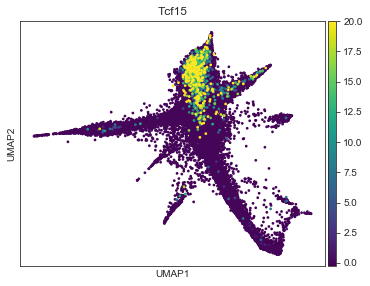

In [172]:
sc.pl.umap(X_s1s2s3, color='Tcf15', size=30, sort_order = True, color_map = 'viridis', vmax=20)

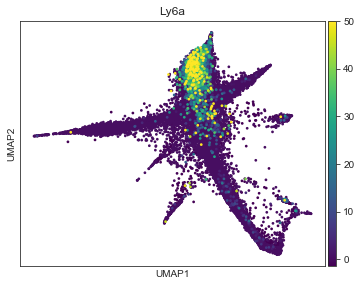

In [175]:
sc.pl.umap(X_s1s2s3, color='Ly6a', size=30, sort_order = True, color_map = 'viridis', vmax=50)

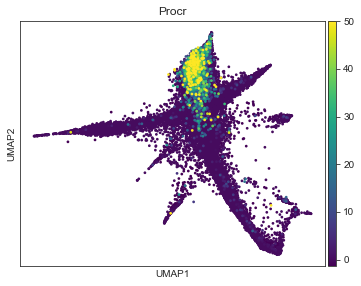

In [176]:
sc.pl.umap(X_s1s2s3, color='Procr', size=30, sort_order = True, color_map = 'viridis', vmax=50)

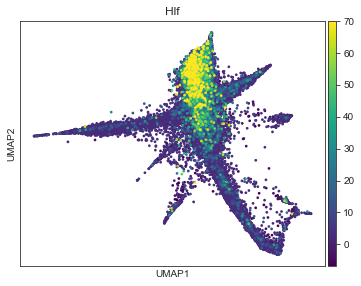

In [177]:
sc.pl.umap(X_s1s2s3, color='Hlf', size=30, sort_order = True, color_map = 'viridis', vmax=70)

In [509]:
#Create an observation for the Activity, Mk-Bias and Size

X_s1s2s3.obs['act'] = (X_s1s2s3.obs['active']==1).values.astype('str')
X_s1s2s3.obs['act'] = X_s1s2s3.obs['act'].replace('True','act')
X_s1s2s3.obs['inact'] = (X_s1s2s3.obs['inactive']==1).values.astype('str')
X_s1s2s3.obs['inact'] = X_s1s2s3.obs['inact'].replace('True','inact')
X_s1s2s3.obs['Activity'] = X_s1s2s3.obs['act'].combine(X_s1s2s3.obs['inact'], func =(lambda x1, x2: x1 if x1 == 'act' else x2))

X_s1s2s3.obs['Multi'] = (X_s1s2s3.obs['notbiased']==1).values.astype('str')
X_s1s2s3.obs['Multi'] = X_s1s2s3.obs['Multi'].replace('True','Multi')
X_s1s2s3.obs['Mkbiased'] = (X_s1s2s3.obs['Mkbias>4']==1).values.astype('str')
X_s1s2s3.obs['Mkbiased'] = X_s1s2s3.obs['Mkbiased'].replace('True','Mkbiased')
X_s1s2s3.obs['Bias'] = X_s1s2s3.obs['Multi'].combine(X_s1s2s3.obs['Mkbiased'], func =(lambda x1, x2: x1 if x1 == 'Multi' else x2))

X_s1s2s3.obs['largeclones'] = (X_s1s2s3.obs['freqHSC']>0.05).values.astype('str')
X_s1s2s3.obs['largeclones'] = X_s1s2s3.obs['largeclones'].replace('True','large')
X_s1s2s3.obs['smallclones'] = (X_s1s2s3.obs['freqHSC']<0.05).values.astype('str')
X_s1s2s3.obs['smallclones'] = X_s1s2s3.obs['smallclones'].replace('True','small')
X_s1s2s3.obs['Size'] = X_s1s2s3.obs['largeclones'].combine(X_s1s2s3.obs['smallclones'], func =(lambda x1, x2: x1 if x1 == 'large' else x2))


In [510]:
###Count how many cells are in each category 
print(X_s1s2s3.obs['Activity'].value_counts())
print(X_s1s2s3.obs['Size'].value_counts())
print(X_s1s2s3.obs['Bias'].value_counts())


act      11939
False    11368
inact     8889
Name: Activity, dtype: int64
small    13337
False    11063
large     7796
Name: Size, dtype: int64
False       17228
Multi       10650
Mkbiased     4318
Name: Bias, dtype: int64


In [511]:
###Label each cell by experiment
X_s1s2s3.obs['experiment'] = X_s1s2s3.obs['batch']

... storing 'act' as categorical
... storing 'inact' as categorical
... storing 'Activity' as categorical
... storing 'Multi' as categorical
... storing 'Mkbiased' as categorical
... storing 'Bias' as categorical
... storing 'largeclones' as categorical
... storing 'smallclones' as categorical
... storing 'Size' as categorical


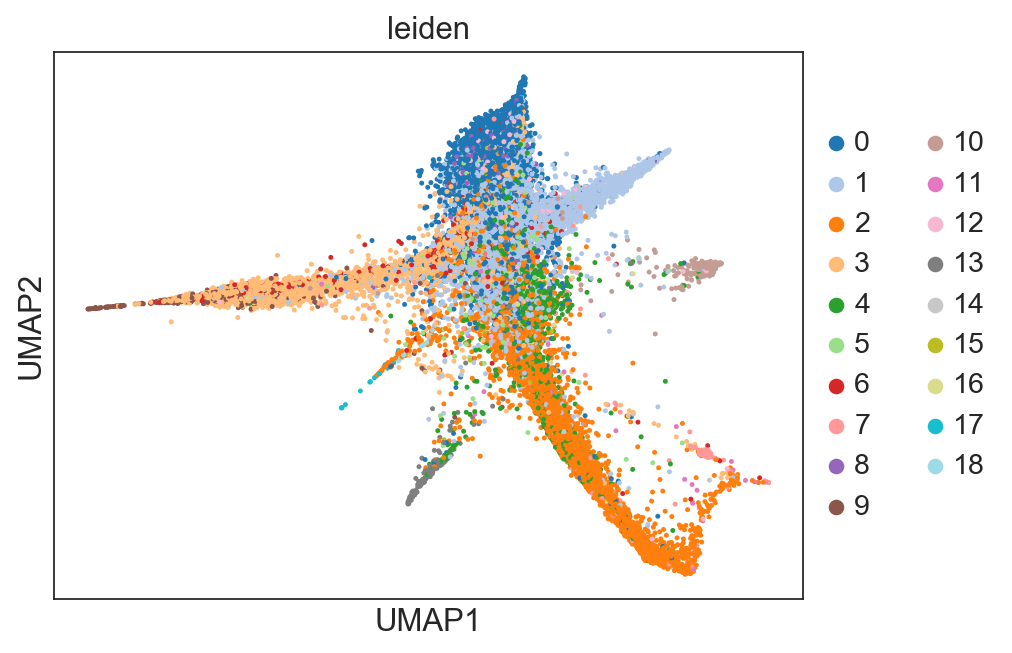

In [512]:
###Use this to compare with Leiden clustering
sc.tl.leiden(X_s1s2s3, resolution = 0.5)
sc.pl.umap(X_s1s2s3, color='leiden', palette = 'tab20', size = 20)

###RESULTS: 
#HSC = cluster 0 
#GM progenitors = clusters 2 and 7
#Mk progenitors = cluster 1
#Ery progenitors = clusters 3 and 9
#MPP = clusters 4 (LMPP-like)  
#preB progenitors = cluster 10
#preDC progenitors = cluster 13
#preBa progenitors = cluster 17
#Clusters 5, 6, 8, 11, 12, 14, 15, 16 and 18 are not robust

In [201]:
###Analyze which Leiden clusters have HSCs
cluster_table = None
cluster_table = pd.DataFrame()
for yy in np.unique(X_s1s2s3.obs['samples'].values):
    x = X_s1s2s3.obs['leiden'][X_s1s2s3.obs['samples']==yy].value_counts()
    y = pd.DataFrame(x)
    y.columns = [yy]
    cluster_table = pd.concat([cluster_table,y], axis=1)

In [202]:
###Show Leiden cluster table
cluster_table

1773_HSC1  1773_HSC2  1773_HSC3  1773_HSC4  1773_Kit1  1773_Kit2  \
0          82        479        380        467         47         57   
1          46        187        164        221        111        160   
2           1          9          4          6         71         87   
3           2          3          2          1         64         85   
4           1          6          3         10         46         77   
5         362         72         63         53         13         20   
6          49         81         77         67         58         64   
7           2         31         16         26          3          7   
8           1          1          2          3          0          0   
9           0          0          0          0          0          0   
10          0          0          0          0          0          1   
11         21         14         21          7          4          7   
12          0          0          0          0          0          0   
13          0          0          0          0          3          3   
14          8         15          2         10          3          0   
15          9         10         11          5          1          3   
16          0          0          0          0          0          0   
17          0          0          0          0          1          2   
18          0          0          0          0          0          0   

    1773_Kit3  1773_Kit4  1774_HSC1  1774_HSC2  ...  1992_Kit4  1992_Kit5  \
0          61         40        500        506  ...         96        146   
1         110        129        257        217  ...        108        143   
2          79         80          5          3  ...        114        183   
3          68         90          3          2  ...         60         49   
4          60         57          6          5  ...         26         39   
5          17         20         76         64  ...          2         12   
6          57         63         63         81  ...          1          0   
7           3          4         20         18  ...         67         44   
8           2          0          4          0  ...          7          8   
9           0          0          0          0  ...          1          1   
10          1          0          1          0  ...         12         26   
11          6          2         25         12  ...          0          0   
12          0          0          0          0  ...         10         15   
13          2          5          0          0  ...          4          3   
14          6          4         16          9  ...          1          1   
15          3          2          8          7  ...          0          0   
16          0          0          0          0  ...          0          1   
17          1          1          0          0  ...          2          0   
18          1          0          0          0  ...          2          0   

    HSC_84_1  HSC_84_2  HSC_85_1  HSC_85_2  Kit_84_1  Kit_84_2  Kit_85_1  \
0        644       600      1327      1399       206       269       381   
1        482       451       491       356       380       495       618   
2          9         3        38        24       774       924      1080   
3         14        19        50        26       379       460       692   
4          1         2        17         7       174       204       283   
5          0         2         1         0         2         0         0   
6          0         0         7         0         3         6         4   
7          1         3        10         7        36        38        41   
8         19        22        41        38        14        16        16   
9          6        13        10        11        82        77       110   
10         0         0         3         0        43        53        32   
11         0         0         7         0         6         9         4   
12         0         0         0  

In [445]:
#Score gene sets for the merged normalized and batch corrected set

sc.tl.score_genes(X_s1s2s3,Giladi, score_name = 'Giladi')
sc.tl.score_genes(X_s1s2s3,Lauridsen, score_name = 'Lauridsen')
sc.tl.score_genes(X_s1s2s3,Wilson_suMo, score_name = 'Wilson_suMo')
sc.tl.score_genes(X_s1s2s3,Wilson_molO, score_name = 'Wilson_molO')
sc.tl.score_genes(X_s1s2s3,Cabezas_HSC_MPP, score_name = 'Cabezas_HSC_MPP')
sc.tl.score_genes(X_s1s2s3,Cabezas_dHSC, score_name = 'Cabezas_dHSC')
sc.tl.score_genes(X_s1s2s3,Rodriguez_2T1T_top100, score_name = 'Rodriguez_2T1T_top100')
sc.tl.score_genes(X_s1s2s3,Rodriguez_inactive_top100, score_name = 'Rodriguez_inactive_top100')
sc.tl.score_genes(X_s1s2s3,Rodriguez_active_top100, score_name = 'Rodriguez_active_top100')
sc.tl.score_genes(X_s1s2s3,Rodriguez_Mkbias_top100, score_name = 'Rodriguez_Mkbias_top100')
sc.tl.score_genes(X_s1s2s3,Rodriguez_Multi_top100, score_name = 'Rodriguez_Multi_top100')
sc.tl.score_genes(X_s1s2s3,Rodriguez_Tcf15, score_name = 'Rodriguez_Tcf15')
sc.tl.score_genes(X_s1s2s3,Rodriguez_HSC1, score_name = 'Rodriguez_HSC1')
sc.tl.score_genes(X_s1s2s3,Rodriguez_HSC2, score_name = 'Rodriguez_HSC2')
sc.tl.score_genes(X_s1s2s3,Rodriguez_HSC3, score_name = 'Rodriguez_HSC3')
sc.tl.score_genes(X_s1s2s3,Rodriguez_HSC4, score_name = 'Rodriguez_HSC4')
sc.tl.score_genes(X_s1s2s3,Pietras, score_name = 'Pietras')
sc.tl.score_genes_cell_cycle(X_s1s2s3, s_genes, g2m_genes)


In [515]:
#Create subdata for the reproducible Louvain HSCclusters
X_HSCc9 = X_s1s2s3[X_s1s2s3.obs["clusters"] == "9",:]
X_HSCc10 = X_s1s2s3[X_s1s2s3.obs["clusters"] == "10",:]
X_HSCc15 = X_s1s2s3[X_s1s2s3.obs["clusters"] == "15",:]
X_HSCc19 = X_s1s2s3[X_s1s2s3.obs["clusters"] == "19",:]
X_HSCs = X_HSCc9.concatenate(X_HSCc10,X_HSCc15,X_HSCc19)

###Use this instead to create subdata for the most abundant and reproducible Leiden HSC clusters
X_HSCs_L = X_s1s2s3[X_s1s2s3.obs["leiden"] == "0",:]

In [545]:
#Create HSC subdata for each experiment
X1_HSCs = X_HSCs[X_HSCs.obs["experiment"] == "0",:]
X2_HSCs = X_HSCs[X_HSCs.obs["experiment"] == "1",:]
X3_HSCs = X_HSCs[X_HSCs.obs["experiment"] == "2",:]

#Create HSC subdata for each experiment using Leiden HSCs - Use these instead of the Louvain-based HSCs to compare
X1_HSCs_L = X_HSCs_L[X_HSCs_L.obs["experiment"] == "0",:]
X2_HSCs_L = X_HSCs_L[X_HSCs_L.obs["experiment"] == "1",:]
X3_HSCs_L = X_HSCs_L[X_HSCs_L.obs["experiment"] == "2",:]

In [341]:
###Count how many HSCs are in each category 
print(X1_HSCs.obs['Activity'].value_counts())
print(X1_HSCs.obs['Bias'].value_counts())
print(X2_HSCs.obs['Activity'].value_counts())
print(X2_HSCs.obs['Bias'].value_counts())
print(X3_HSCs.obs['Activity'].value_counts())
print(X3_HSCs.obs['Bias'].value_counts())

inact    2413
False    1709
act      1104
Name: Activity, dtype: int64
False       2675
Mkbiased    1757
Multi        794
Name: Bias, dtype: int64
False    3849
inact    3018
act      1713
Name: Activity, dtype: int64
False       5606
Multi       2079
Mkbiased     895
Name: Bias, dtype: int64
inact    1238
False    1189
act       614
Name: Activity, dtype: int64
False       1810
Multi       1009
Mkbiased     222
Name: Bias, dtype: int64


In [548]:
###Count how many HSCs are in each category for the Leiden HSCs
print(X1_HSCs_L.obs['Activity'].value_counts())
print(X1_HSCs_L.obs['Bias'].value_counts())
print(X2_HSCs_L.obs['Activity'].value_counts())
print(X2_HSCs_L.obs['Bias'].value_counts())
print(X3_HSCs_L.obs['Activity'].value_counts())
print(X3_HSCs_L.obs['Bias'].value_counts())

inact    2299
False    1607
act      1217
Name: Activity, dtype: int64
False       2527
Mkbiased    1674
Multi        922
Name: Bias, dtype: int64
False    1642
inact    1586
act       541
Name: Activity, dtype: int64
False       2417
Multi        894
Mkbiased     458
Name: Bias, dtype: int64
False    811
inact    807
act      327
Name: Activity, dtype: int64
False       1207
Multi        595
Mkbiased     143
Name: Bias, dtype: int64


In [206]:
###Differential gene expression analysis for HSC subcluster 9 ("HSC1") 

sc.tl.rank_genes_groups(X_HSCs, groupby='clusters', groups = ['9'], use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_biasXall=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_biasXall.to_csv('HSC1_combined.tsv', '\t', index=False)

... storing 'barcodes' as categorical
... storing 'clusters' as categorical
... storing 'leiden' as categorical
/Users/alejorodriguez/miniconda2/envs/py36/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/Users/alejorodriguez/miniconda2/envs/py36/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:223: RuntimeWarning: divide by zero encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))
/Users/alejorodriguez/miniconda2/envs/py36/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:223: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


In [207]:
###Differential gene expression analysis for HSC subcluster 10 ("HSC3")

sc.tl.rank_genes_groups(X_HSCs, groupby='clusters', groups = ['10'], use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_biasXall=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_biasXall.to_csv('HSC3_combined.tsv', '\t', index=False)


In [208]:
###Differential gene expression analysis for HSC subcluster 19 ("HSC2")

sc.tl.rank_genes_groups(X_HSCs, groupby='clusters', groups = ['19'], use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_biasXall=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_biasXall.to_csv('HSC2_combined.tsv', '\t', index=False)


In [209]:
###Differential gene expression analysis for HSC subcluster 15 ("HSC4")

sc.tl.rank_genes_groups(X_HSCs, groupby='clusters', groups = ['15'], use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_biasXall=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_biasXall.to_csv('HSC4_combined.tsv', '\t', index=False)


In [210]:
###Differential gene expression analysis for all clusters - Using only data from X_1

sc.tl.rank_genes_groups(X_1, groupby='clusters', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_1.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score1=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score1.to_csv('Clusters_X1.tsv', '\t', index=False)


In [211]:
###Differential gene expression analysis for all clusters - Using all data

sc.tl.rank_genes_groups(X_s1s2s3, groupby='clusters', use_raw = False, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_s1s2s3.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_all=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_all.to_csv('Clusters_all.tsv', '\t', index=False)


In [212]:
###Differential gene expression analysis for Leiden clusters 

sc.tl.rank_genes_groups(X_s1s2s3, groupby='leiden', use_raw = False, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_s1s2s3.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_leiden=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_leiden.to_csv('Clusters_leiden.tsv', '\t', index=False)

In [448]:
### For plotting and comparing observations (signatures, calculations, etc.) among HSCs, 
### we need to drop the non-barcoded cells using dropna(). 

X1_HSCs.obs2 = X1_HSCs.obs.dropna()
X2_HSCs.obs2 = X2_HSCs.obs.dropna()
X3_HSCs.obs2 = X3_HSCs.obs.dropna()

In [449]:
### We use this to average the observations for each clone and then print them to a table

X1_HSCs.Means = X1_HSCs.obs2.groupby('barcodes').mean()
X2_HSCs.Means = X2_HSCs.obs2.groupby('barcodes').mean()
X3_HSCs.Means = X3_HSCs.obs2.groupby('barcodes').mean()
X1_HSCs.Means.to_csv('X1_HSCs_table_new.tsv','\t')
X2_HSCs.Means.to_csv('X2_HSCs_table_new.tsv','\t')
X3_HSCs.Means.to_csv('X3_HSCs_table_new.tsv','\t')

In [554]:
### In order to plot the signature scores, we first subsample X number of HSCs

#X_HSCs_sub = sc.pp.subsample(X_HSCs, n_obs=1000, random_state=5, copy=True)
X_HSCs_sub = X_HSCs
X_HSCs_sub = X_HSCs_sub[X_HSCs_sub.obs['relout'] != "NaN",:]

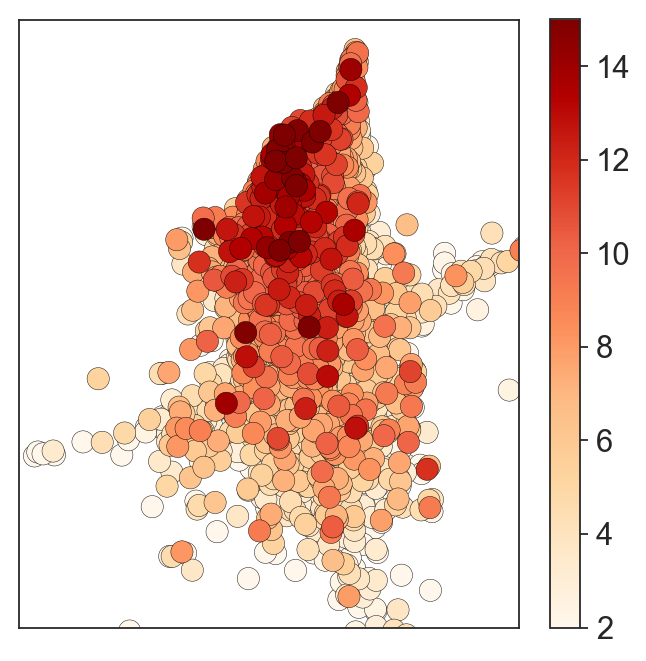

In [555]:
### Here we plot the different gene signatures in HSCs
 
### If needed, add some randome jitter, for easier visualization
#def rand_jitter(arr):
#    stdev = .02*(max(arr)-min(arr))
#    return arr + np.random.randn(len(arr)) * stdev
#X_HSCs750.obs['x'] = rand_jitter(X_HSCs750.obs['x'])
#X_HSCs750.obs['y'] = rand_jitter(X_HSCs750.obs['y'])

###Prints: [8.0, 6.0]
#print ("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#print ("New size:", fig_size)

order = np.argsort(X_HSCs_sub.obs['Giladi'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Giladi'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=2, vmax=15)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/GiladiPlot.png', dpi=300)


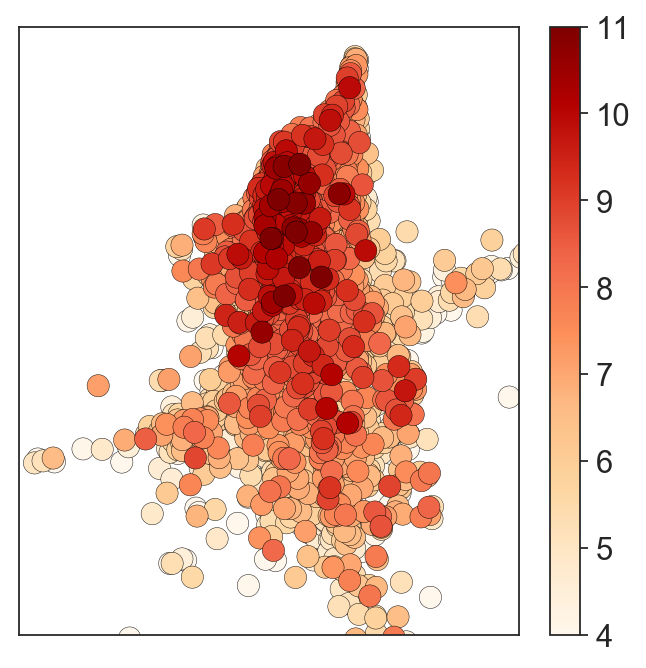

In [551]:
order = np.argsort(X_HSCs_sub.obs['Lauridsen'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Lauridsen'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=4, vmax=11)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/LauridsenPlot.png', dpi=300)


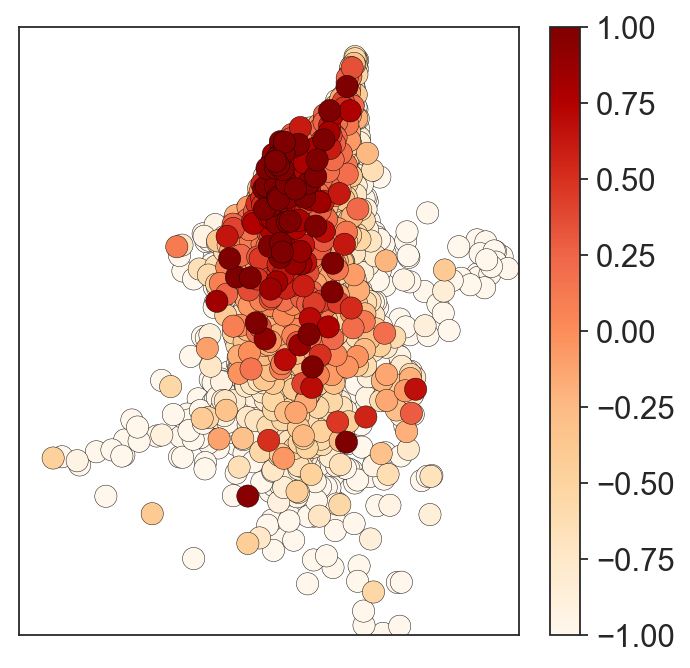

In [471]:
order = np.argsort(X_HSCs_sub.obs['Cabezas_HSC_MPP'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Cabezas_HSC_MPP'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=-1, vmax=1)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/CabezasHSCMPPPlot.png', dpi=300)


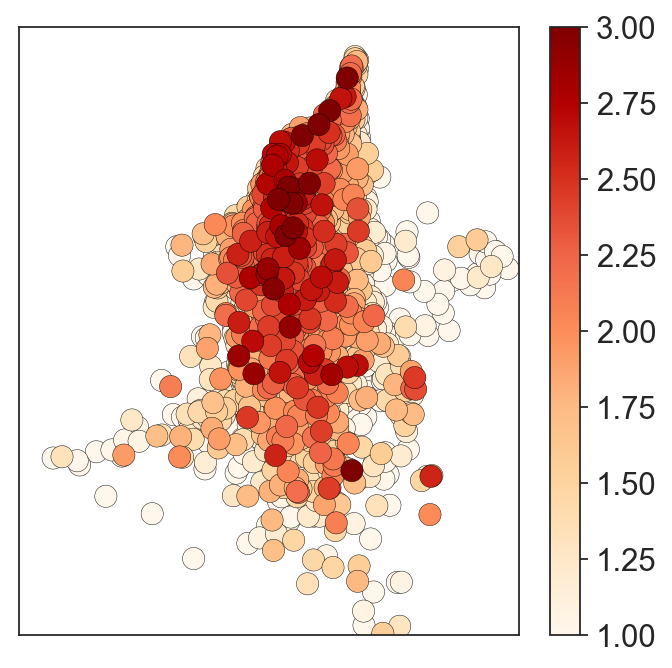

In [472]:
order = np.argsort(X_HSCs_sub.obs['Cabezas_dHSC'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Cabezas_dHSC'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=1, vmax=3)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/CabezasdHSCPlot.png', dpi=300)


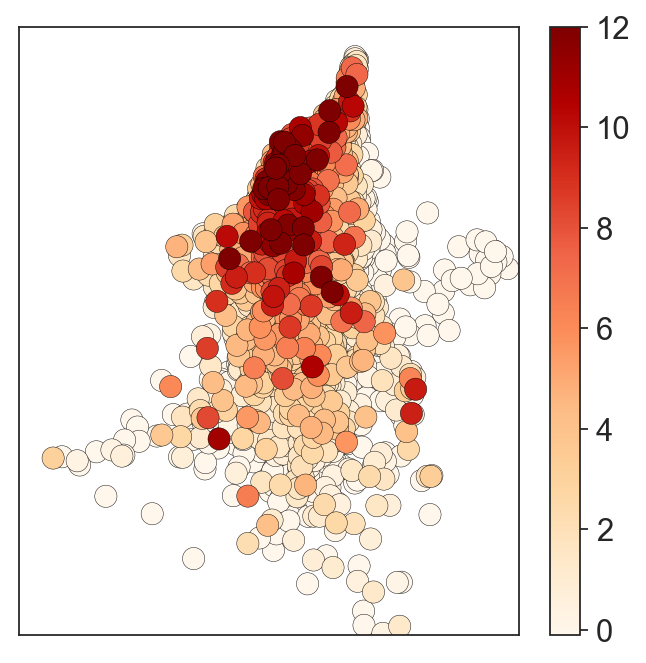

In [473]:
order = np.argsort(X_HSCs_sub.obs['Wilson_molO'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Wilson_molO'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=-0.1, vmax=12)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/WilsonMolOPlot.png', dpi=300)


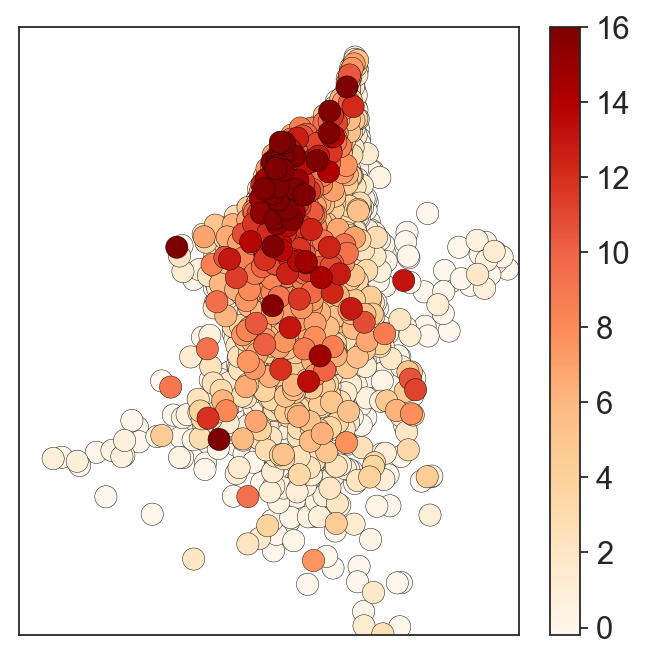

In [474]:
order = np.argsort(X_HSCs_sub.obs['Wilson_suMo'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Wilson_suMo'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=-0.2, vmax=16)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/WilsonSuMOPlot.png', dpi=300)


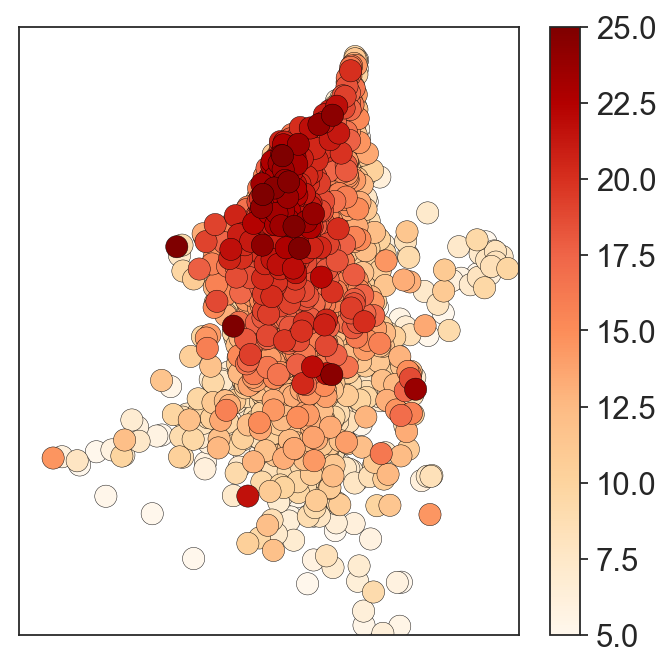

In [475]:
order = np.argsort(X_HSCs_sub.obs['Rodriguez_inactive_top100'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Rodriguez_inactive_top100'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=5, vmax=25)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/InactiveSignaturePlot.png', dpi=300)


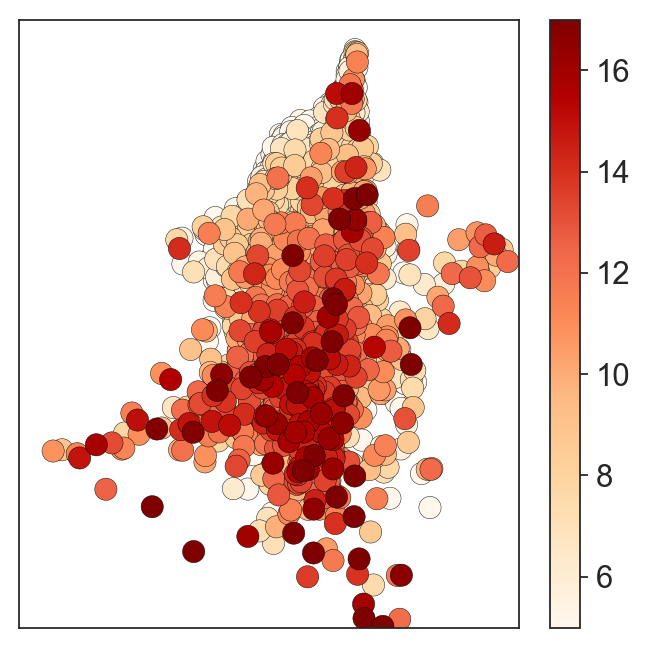

In [476]:
order = np.argsort(X_HSCs_sub.obs['Rodriguez_active_top100'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Rodriguez_active_top100'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=5, vmax=17)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/ActiveSignaturePlot.png', dpi=300)


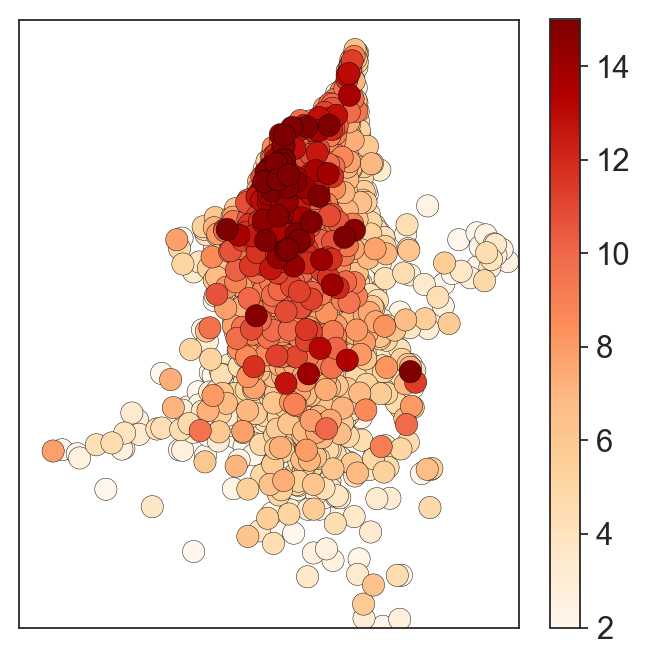

In [477]:
order = np.argsort(X_HSCs_sub.obs['Rodriguez_2T1T_top100'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Rodriguez_2T1T_top100'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=2, vmax=15)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/Top80SignaturePlot.png', dpi=300)


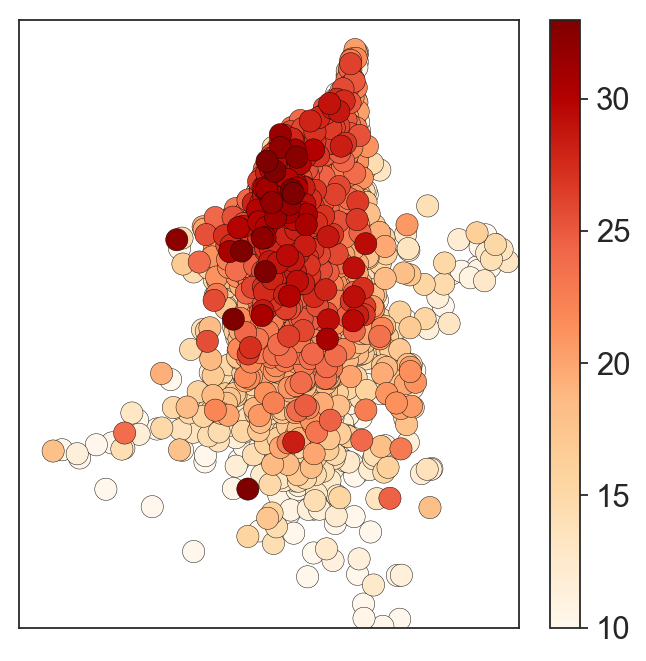

In [478]:
order = np.argsort(X_HSCs_sub.obs['Rodriguez_Mkbias_top100'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Rodriguez_Mkbias_top100'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=10, vmax=33)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/MkbiasSignaturePlot.png', dpi=300)


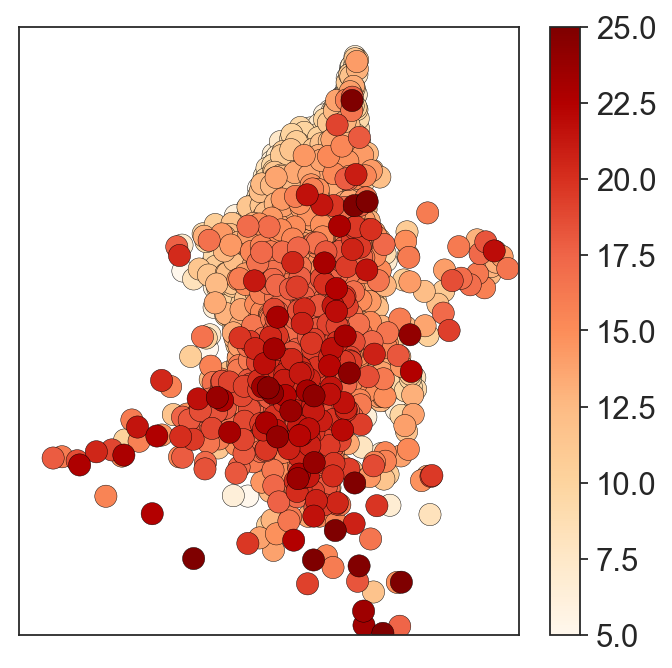

In [479]:
order = np.argsort(X_HSCs_sub.obs['Rodriguez_Multi_top100'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Rodriguez_Multi_top100'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=5, vmax=25)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/MultlinSignaturePlot.png', dpi=300)


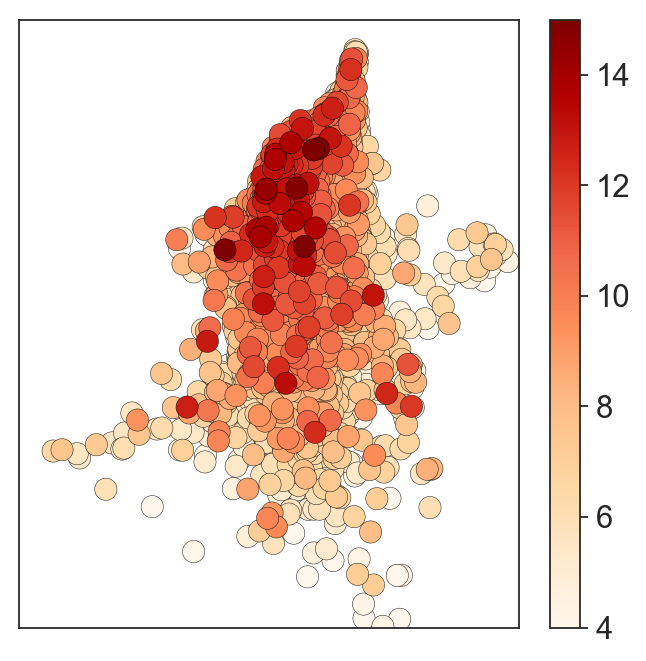

In [480]:
order = np.argsort(X_HSCs_sub.obs['Rodriguez_Tcf15'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Rodriguez_Tcf15'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=4, vmax=15)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/Tcf15SignaturePlot.png', dpi=300)


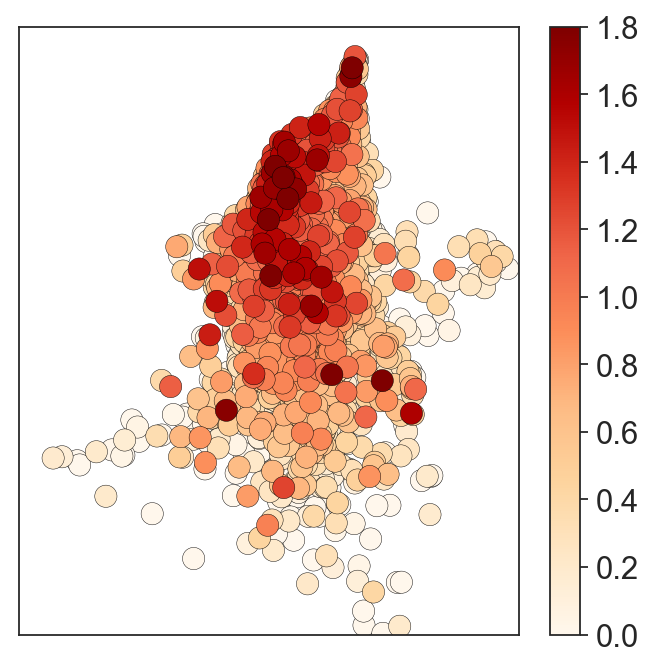

In [483]:
order = np.argsort(X_HSCs_sub.obs['Pietras'])
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Pietras'][order], cmap = 'OrRd', alpha = 1, linewidths = 0.2, edgecolors = 'black', vmin=0, vmax=1.8)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
#plt.show()
plt.savefig('figures/PietrasSignaturePlot.png', dpi=300)


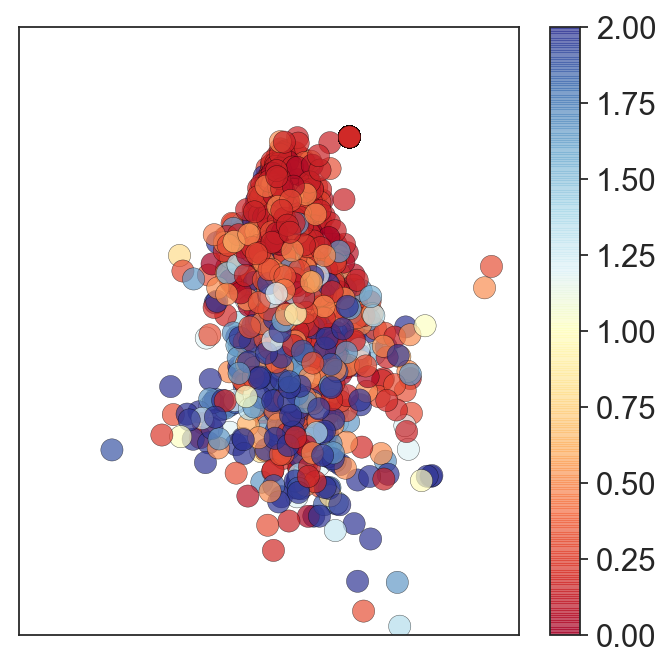

In [378]:
### This is to plot values of activity for a random sample of HSCs
order = np.flip(np.argsort(X_HSCs_sub.obs['relout']))
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['relout'][order], cmap = 'RdYlBu', alpha = 0.7, linewidths = 0.2, edgecolors = 'black', vmin=0, vmax=2)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
plt.show()
#plt.savefig('figures/RelativeActivityPlot.pdf')


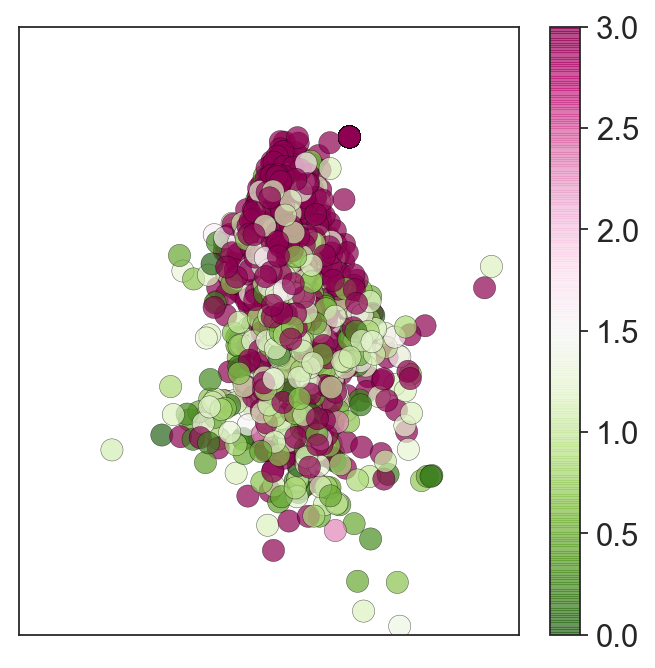

In [379]:
### This is to plot values of Mk-bias for a random sample of HSCs
order = np.flip(np.argsort(X_HSCs_sub.obs['Mkbias']))
plt.scatter(X_HSCs_sub.obs['x'][order],X_HSCs_sub.obs['y'][order], s = 100, c = X_HSCs_sub.obs['Mkbias'][order], cmap = my_cmap_r, alpha = 0.7, linewidths = 0.2, edgecolors = 'black', vmin=0, vmax=3)
plt.colorbar()
plt.gca().set_ylim(-400,750)
plt.gca().set_xlim(400,1400)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])
plt.gca().xaxis.set_ticks([])
plt.gca().grid(False)
plt.show()
#plt.savefig('figures/RelativeActivityPlot.pdf')


(600, 1298)

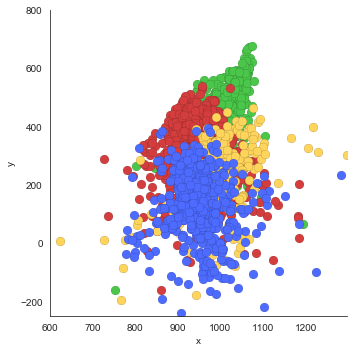

In [248]:
### Here, we plot the HSC subclusters, as identified by Louvain

import seaborn as sns

sns.set_style("white", {'axes.grid' : False, 'xtick.bottom' : False, 'ytick.bottom' : False})
g = sns.PairGrid(x_vars=["x"], y_vars=["y"], data=table3, hue="clusters", height=5, aspect=1, hue_order =['19','9','15','10'],palette=['#4AC74A','#D43D3D','#FFD45B','#4D6BFF'])
g = g.map(plt.scatter, s=80, edgecolors="black", linewidth=0.1)
g.axes[0,0].set_ylim(-250,800)
g.axes[0,0].set_xlim(600,1298)
#g.savefig("figures/clustersHSCs.png", dpi=300)


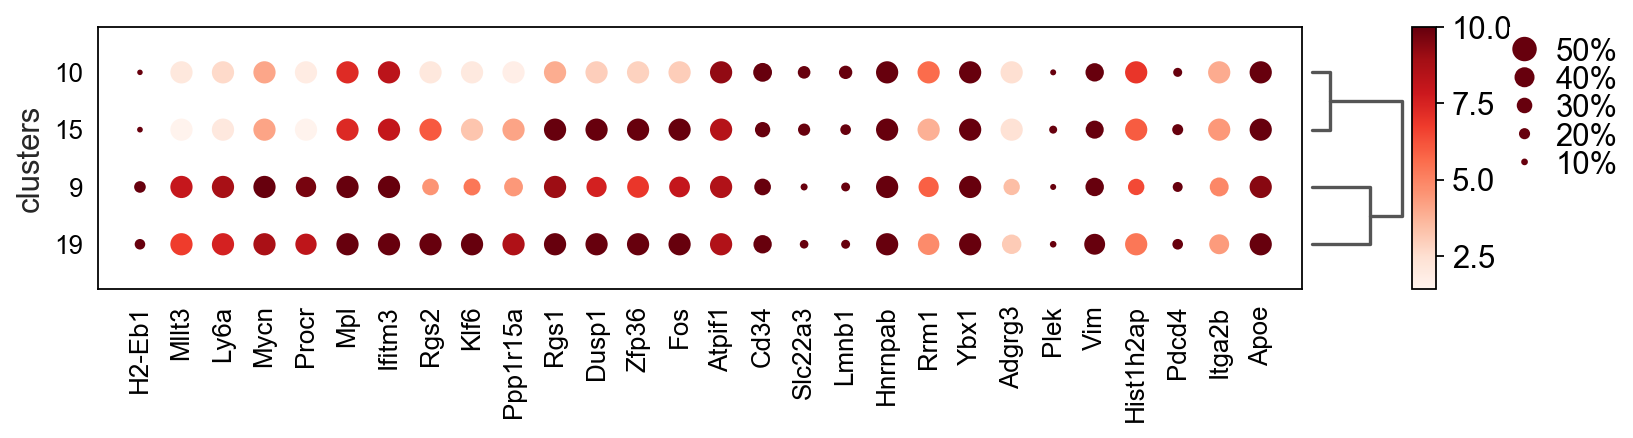

In [257]:
### Set figure parameters for saving figures with scanpy
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=300, frameon=True, vector_friendly=True, fontsize=14, format='pdf', transparent=False, ipython_format='png2x'), 

### Here, we plot some differentially expressed genes that distinguish HSC subclusters

genes_to_dotplot = ['H2-Eb1','Mllt3','Ly6a','Mycn','Procr','Mpl','Ifitm3','Rgs2','Klf6','Ppp1r15a','Rgs1','Dusp1','Zfp36','Fos','Atpif1','Cd34','Slc22a3','Lmnb1','Hnrnpab','Rrm1','Ybx1','Adgrg3','Plek','Vim','Hist1h2ap','Pdcd4','Itga2b','Apoe']
dotplot = sc.pl.dotplot(X_HSCs, genes_to_dotplot, groupby='clusters', mean_only_expressed=True, color_map='Reds', dot_max=0.5, dot_min=0, figsize=None, dendrogram=True, standard_scale=True, vmin = 1.4, vmax= 10,save = 'dotplot.pdf')                  

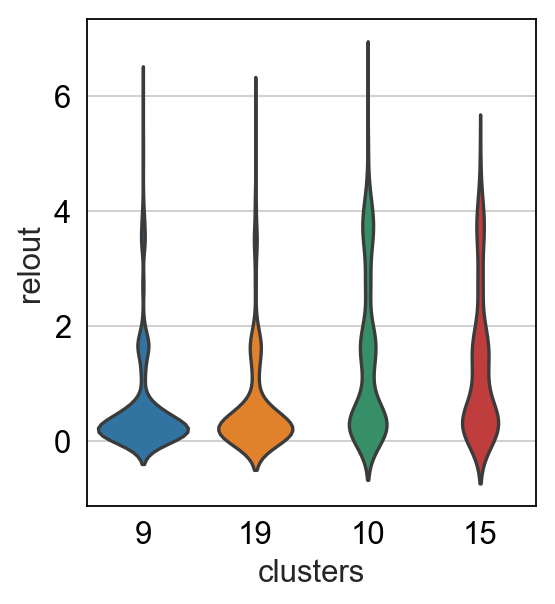

In [258]:
### Here, we plot violinplots of activity across subclusters

sc.pl.violin(X_1,'relout',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area', save='clusters_relout.pdf')
#sc.pl.violin(X_2[X_2.obs['relout']<8],'relout',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')
#sc.pl.violin(X_3,'relout',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')

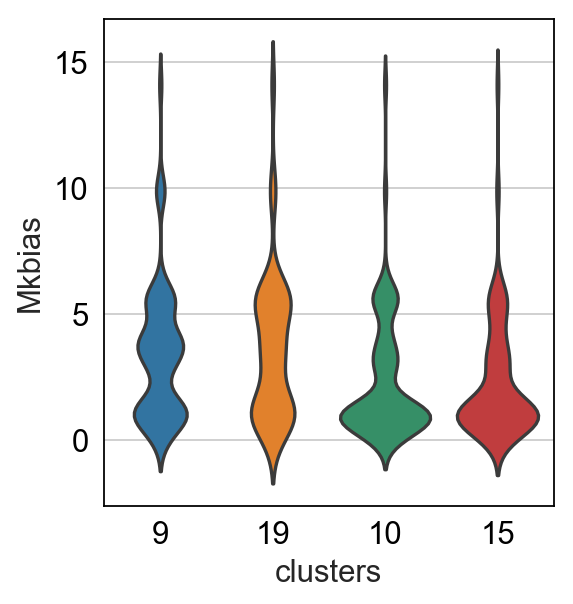

In [259]:
### Here, we plot violinplots of Mk-bias across subclusters

sc.pl.violin(X_1,'Mkbias',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area', save='clusters_Mk.pdf')
#sc.pl.violin(X_2,'Mkbias2',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')
#sc.pl.violin(X_3,'Mkbias2',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')


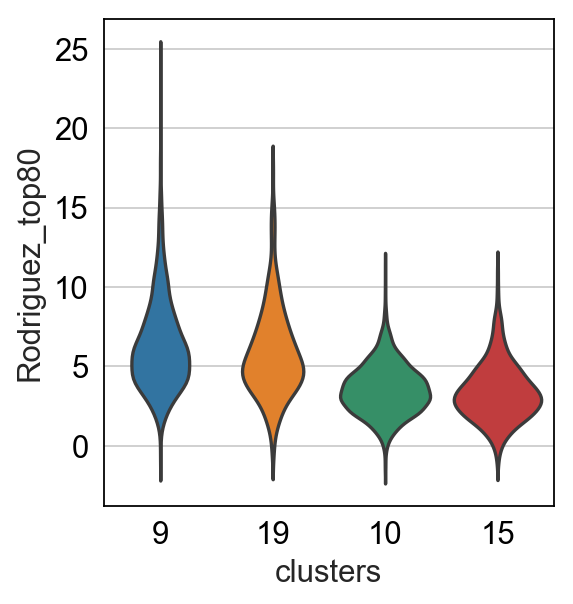

In [260]:
### Here, we plot violinplots of signature scores across subclusters

sc.pl.violin(X_1,'Rodriguez_2T1T_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area', save='clusters_Rodriguez_2T1T_top100.pdf')
#sc.pl.violin(X_2,'Rodriguez_2T1T_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')
#sc.pl.violin(X_3,'Rodriguez_2T1T_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')

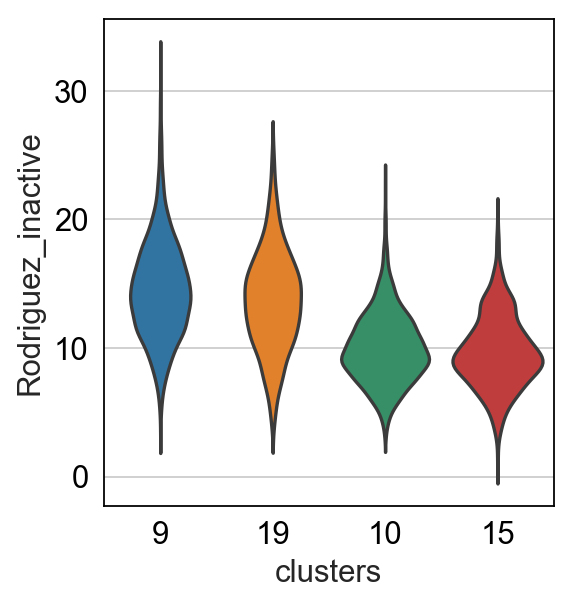

In [261]:
sc.pl.violin(X_1,'Rodriguez_inactive_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area', save='clusters_Rodriguez_inactive_top100.pdf')
#sc.pl.violin(X_2,'Rodriguez_inactive',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')
#sc.pl.violin(X_3,'Rodriguez_inactive',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')

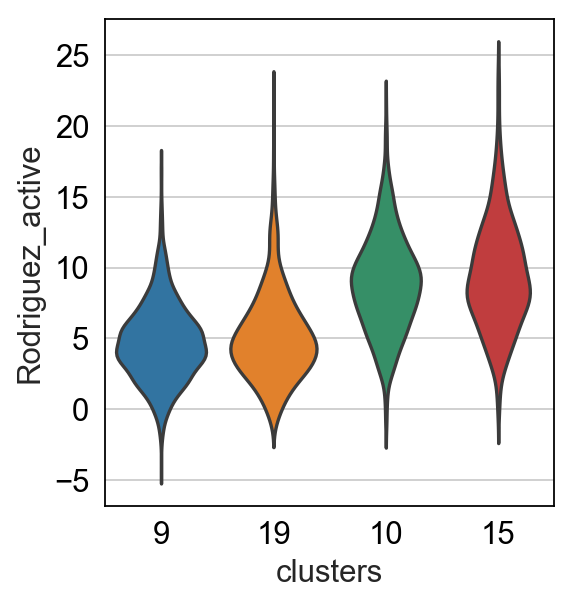

In [262]:
sc.pl.violin(X_1,'Rodriguez_active_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area', save='clusters_Rodriguez_active_top100.pdf')
#sc.pl.violin(X_2,'Rodriguez_active_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')
#sc.pl.violin(X_3,'Rodriguez_active_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')

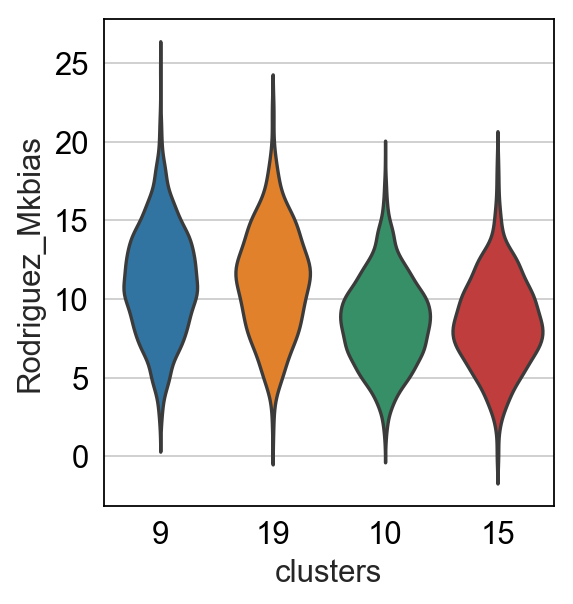

In [263]:
sc.pl.violin(X_1,'Rodriguez_Mkbias_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area', save='clusters_Rodriguez_Mkbias_top100.pdf')
#sc.pl.violin(X_2,'Rodriguez_Mkbias_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')
#sc.pl.violin(X_3,'Rodriguez_Mkbias_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')

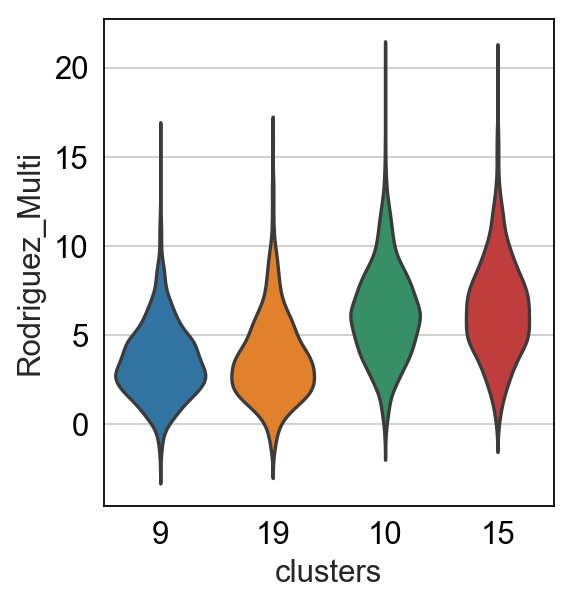

In [264]:
sc.pl.violin(X_1,'Rodriguez_Multi_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area', save='clusters_Rodriguez_Multi_top100.pdf')
#sc.pl.violin(X_2,'Rodriguez_Multi_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')
#sc.pl.violin(X_3,'Rodriguez_Multi_top100',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')

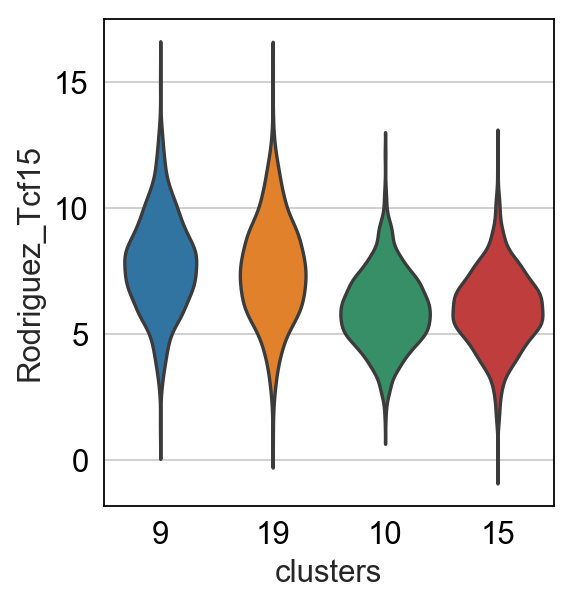

In [265]:
sc.pl.violin(X_1,'Rodriguez_Tcf15',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area', save='clusters_Tcf15Signature.pdf')
#sc.pl.violin(X_2,'Rodriguez_Tcf15',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')
#sc.pl.violin(X_3,'Rodriguez_Tcf15',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')

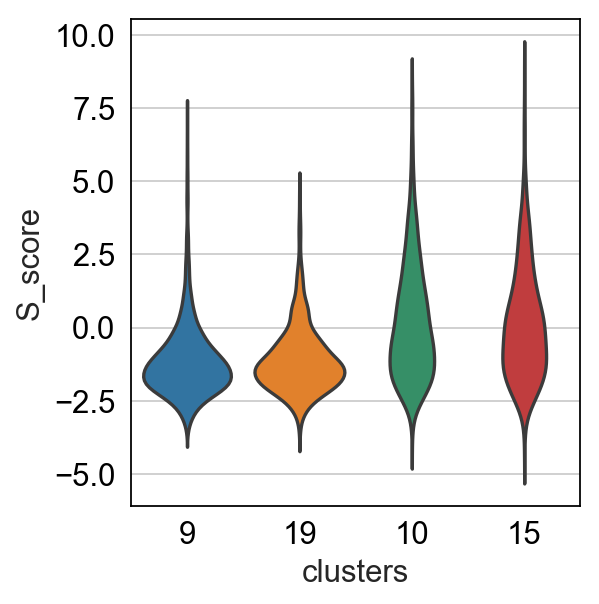

In [266]:
sc.pl.violin(X_1,'S_score',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area', save='clusters_cycle_signature.pdf')
#sc.pl.violin(X_2,'S_score',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')
#sc.pl.violin(X_3,'S_score',groupby='clusters',order=['9','19','10','15'], log=False, stripplot=False, scale='area')

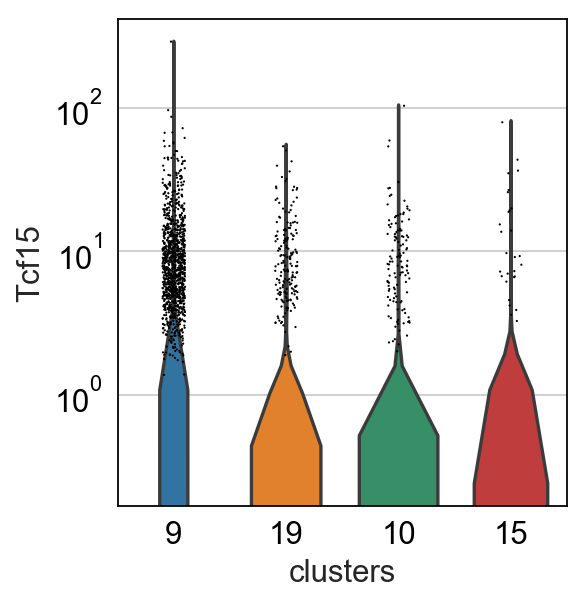

In [267]:
### Here we plot Tcf15 levels across HSC subclusters

sc.pl.violin(X_HSCs,'Tcf15',groupby='clusters',order=['9','19','10','15'], stripplot=True, log=True, scale='area', save='clusters_Tcf15Exp.pdf')

In [560]:
### Here we perform differential gene expression analysis for Activity

sc.tl.rank_genes_groups(X1_HSCs, groupby='Activity', groups = ['inact'], reference = 'act', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X1_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_actX1=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_actX1.to_csv('inactive_vs_activeX1-new.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X2_HSCs, groupby='Activity', groups = ['inact'], reference = 'act', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X2_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_actX2=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_actX2.to_csv('inactive_vs_activeX2-new.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X3_HSCs, groupby='Activity', groups = ['inact'], reference = 'act', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X3_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_actX3=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_actX3.to_csv('inactive_vs_activeX3-new.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X_HSCs, groupby='Activity', groups = ['inact'], reference = 'act', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_actXall=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_actXall.to_csv('inactive_vs_active_combinedNORM.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X_HSCs_L, groupby='Activity', groups = ['inact'], reference = 'act', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_HSCs_L.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_actXall=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_actXall.to_csv('inactive_vs_active_combinedNORM_LeidenHSCs.tsv', '\t', index=False)

gene_score_act = pd.concat([gene_score_actX1, gene_score_actX2, gene_score_actX3], axis = 0)
gene_score_act_means = gene_score_act.groupby('inact_names',as_index=False).mean()
gene_score_act_means.to_csv('inactive_vs_active_averagedNORM.tsv', '\t', index=False)

Trying to set attribute `.obs` of view, making a copy.
... storing 'barcodes' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'clusters' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'leiden' as categorical
/Users/alejorodriguez/miniconda2/envs/py36/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/Users/alejorodriguez/miniconda2/envs/py36/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:223: RuntimeWarning: divide by zero encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))
/Users/alejorodriguez/miniconda2/envs/py36/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:223: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges

In [561]:
### Here we perform differential gene expression analysis for Mk-bias

sc.tl.rank_genes_groups(X1_HSCs, groupby='Bias', groups = ['Multi'], reference = 'Mkbiased', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X1_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_biasX1=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_biasX1.to_csv('Multi4_newX1-new.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X2_HSCs, groupby='Bias', groups = ['Multi'], reference = 'Mkbiased', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X2_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_biasX2=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_biasX2.to_csv('Multi4_newX2-new.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X3_HSCs, groupby='Bias', groups = ['Multi'], reference = 'Mkbiased', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X3_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_biasX3=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_biasX3.to_csv('Multi4_newX3-new.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X_HSCs, groupby='Bias', groups = ['Multi'], reference = 'Mkbiased', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_biasXall=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_biasXall.to_csv('Multi4_newX_combinedNORM.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X_HSCs_L, groupby='Bias', groups = ['Multi'], reference = 'Mkbiased', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X_HSCs_L.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_biasXall=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_biasXall.to_csv('Multi4_newX_combinedNORM_LeidenHSCs.tsv', '\t', index=False)

gene_score_bias = pd.concat([gene_score_biasX1, gene_score_biasX2, gene_score_biasX3], axis = 0)
gene_score_bias_means = gene_score_bias.groupby('Multi_names', as_index=False).mean()
gene_score_bias_means.to_csv('Multi_vs_Mkbiased4_averagedNORM.tsv', '\t', index=False)

In [270]:
### Although it is not in the manuscript, we also performed differential expression between large and small clones 

sc.tl.rank_genes_groups(X1_HSCs, groupby='Size', groups = ['large'], reference = 'small', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X1_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_sizeX1=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_sizeX1.to_csv('largeclonesX1.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X2_HSCs, groupby='Size', groups = ['large'], reference = 'small', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X2_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_sizeX2=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_sizeX2.to_csv('largeclonesX2.tsv', '\t', index=False)

sc.tl.rank_genes_groups(X3_HSCs, groupby='Size', groups = ['large'], reference = 'small', use_raw = True, method='t-test_overestim_var', corr_method = 'benjamini-hochberg', n_genes=38458, rankby_abs=False, key_added=None, copy=False)
result = X3_HSCs.uns['rank_genes_groups']
groups = result['names'].dtype.names
gene_score_sizeX3=pd.DataFrame({group + '_' + key: result[key][group]
                            for group in groups 
                              for key in ['names', 'scores', 'logfoldchanges','pvals']})  
gene_score_sizeX3.to_csv('largeclonesX3.tsv', '\t', index=False)

gene_score_size = pd.concat([gene_score_sizeX1, gene_score_sizeX2, gene_score_sizeX3], axis = 0)
gene_score_size_means = gene_score_size.groupby('large_names', as_index=False).mean()
gene_score_size_means.to_csv('Large_vs_Small_averagedNORM.tsv', '\t', index=False)

In [864]:
#We use this to calculate qc metrics

sc.pp.calculate_qc_metrics(X_1, inplace=True)
sc.pp.calculate_qc_metrics(X_2, inplace=True)
sc.pp.calculate_qc_metrics(X_3, inplace=True)
sc.pp.calculate_qc_metrics(X_HSCs, inplace=True)

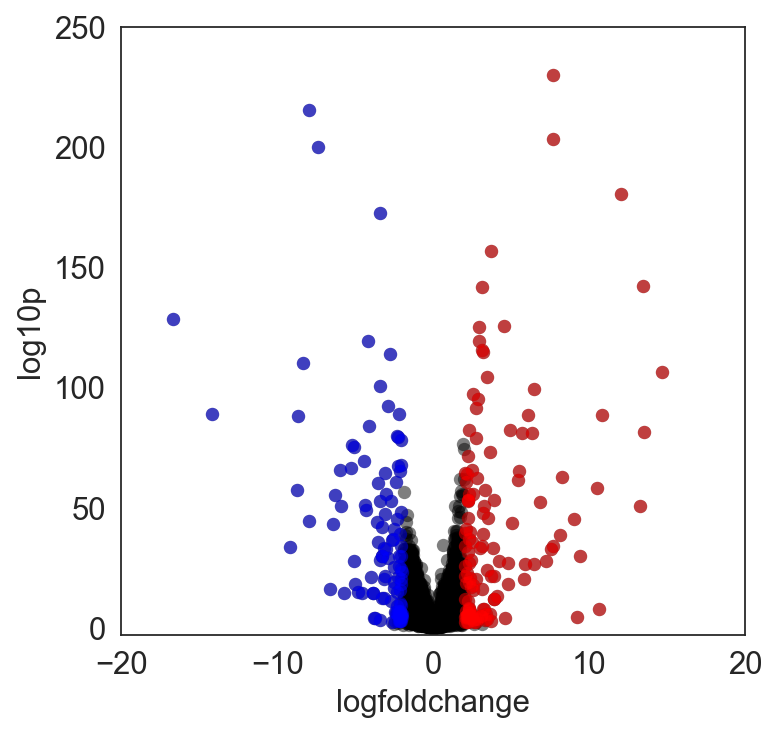

In [287]:
# This is to plot the volcanoplots from DGE Inactive in red vs. Active in blue
import pandas as pd
import numpy as np
import seaborn as sns

volcanoI = pd.read_csv('inactive_vs_active_combinedNORM.tsv','\t')
log10 = -volcanoI['inact_pvals'].apply(np.log)
volcanoI = pd.concat((volcanoI,log10),axis=1)
volcanoI.columns = ['name', 'score','logfoldchange','pval','log10p']

sns.set_style("white", {'axes.grid' : False, 'xtick.bottom' : False, 'ytick.bottom' : False})
g = sns.scatterplot(x="logfoldchange", y="log10p", data=volcanoI, color = 'black', linewidth=0, alpha=0.5)
g.figure.set_size_inches(5, 5)
g.set(xlim=(-20, 20))
g.set(ylim=(-3,250))
g = sns.scatterplot(x="logfoldchange", y="log10p", data=volcanoI[(volcanoI['log10p']>2) & (volcanoI['logfoldchange']>2)], color = 'red', linewidth=0, alpha=0.5)
g = sns.scatterplot(x="logfoldchange", y="log10p", data=volcanoI[(volcanoI['log10p']>2) & (volcanoI['logfoldchange']<-2)], color = 'blue', linewidth=0, alpha=0.5)
g2 = g.get_figure()
g2.savefig('volcanoInact.png', dpi=300)


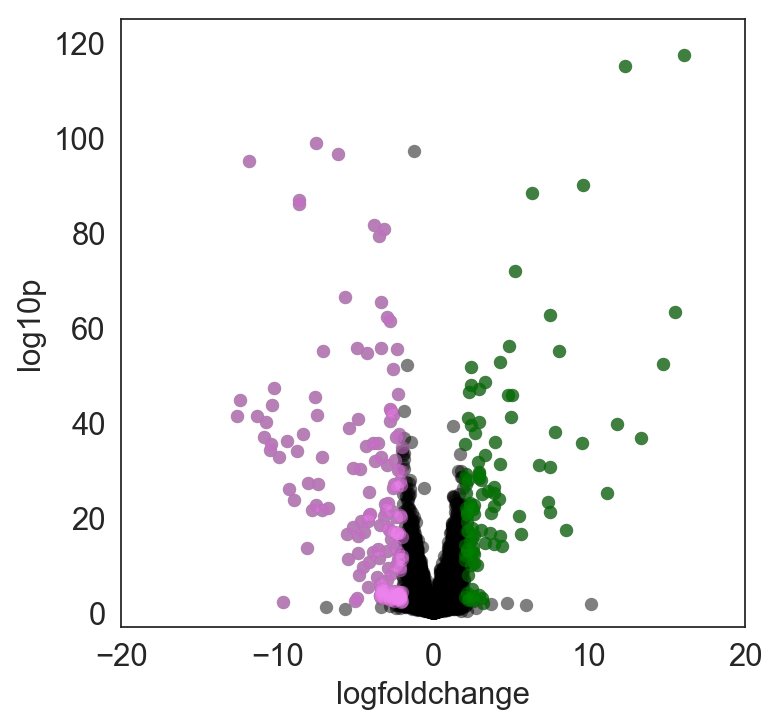

In [288]:
# This is to plot the volcanoplots from DGE  Multilineage in green vs Mk-bias>4 in pink

import pandas as pd
import numpy as np
import seaborn as sns

volcanoI = pd.read_csv('Multi4_newX_combinedNORM.tsv','\t')
log10 = -volcanoI['Multi_pvals'].apply(np.log)
volcanoI = pd.concat((volcanoI,log10),axis=1)
volcanoI.columns = ['name', 'score','logfoldchange','pval','log10p']

sns.set_style("white", {'axes.grid' : False, 'xtick.bottom' : False, 'ytick.bottom' : False})
g = sns.scatterplot(x="logfoldchange", y="log10p", data=volcanoI, color = 'black', linewidth=0, alpha=0.5)
g.figure.set_size_inches(5, 5)
g.set(xlim=(-20, 20))
g.set(ylim=(-3,125))
g = sns.scatterplot(x="logfoldchange", y="log10p", data=volcanoI[(volcanoI['log10p']>2) & (volcanoI['logfoldchange']>2)], color = 'green', linewidth=0, alpha=0.5)
g = sns.scatterplot(x="logfoldchange", y="log10p", data=volcanoI[(volcanoI['log10p']>2) & (volcanoI['logfoldchange']<-2)], color = 'violet', linewidth=0, alpha=0.5)
g2 = g.get_figure()
g2.savefig('volcanoMk.png', dpi=300)


In [441]:
# I use this is to obtain a table of the levels of expression of Tcf15 per cell, and also to group-average this value for clones

marker_genes = ['Tcf15']
genedf = sc.get.obs_df(
        X_HSCs,
        keys=["barcodes", "relout", *marker_genes]
    )
grouped = genedf.groupby("barcodes")
mean, var = grouped.mean(), grouped.var()

In [464]:
# I use these commands to obtain a table for the correlations of gene set scores in HSCs

cols = ['Rodriguez_inactive_top100','Rodriguez_Mkbias_top100','Cabezas_HSC_MPP','Giladi','Lauridsen','Pietras','Wilson_molO','Wilson_suMo','Cabezas_dHSC', 'relout','Mkbias','S_score','Rodriguez_Multi_top100','Rodriguez_active_top100','Rodriguez_Tcf15','Rodriguez_2T1T_top100']
X1_HSCs_cols = X1_HSCs.obs[cols].dropna()
X2_HSCs_cols = X2_HSCs.obs[cols].dropna()
X3_HSCs_cols = X3_HSCs.obs[cols].dropna()
X1_HSCs_cols = X1_HSCs_cols.transpose()
X2_HSCs_cols = X2_HSCs_cols.transpose()
X3_HSCs_cols = X3_HSCs_cols.transpose()
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

pairwise = pd.DataFrame(
    squareform(pdist(X1_HSCs_cols, metric='correlation')), columns = cols, index = cols)
Pearson_corrs_X1 = 1-pairwise

pairwise = pd.DataFrame(
    squareform(pdist(X2_HSCs_cols, metric='correlation')), columns = cols, index = cols)
Pearson_corrs_X2 = 1-pairwise

pairwise = pd.DataFrame(
    squareform(pdist(X3_HSCs_cols, metric='correlation')), columns = cols, index = cols)
Pearson_corrs_X3 = 1-pairwise

Pearson_corrs = pd.concat((Pearson_corrs_X1, Pearson_corrs_X2,Pearson_corrs_X3), axis=0)
Pearson_corrs.to_csv('Correlations.tsv','\t')